## Introduction au MLOps - Projet M2SIAD DS Sem 1

### Étude sur les Adhérents de la Médiathèque de Roubaix en 2020

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn 
import matplotlib.pyplot as plt 

import scipy.stats as ss
from scipy.stats import chi2_contingency
from matplotlib.colors import to_hex
from seaborn import color_palette

#### Importation de la base

In [4]:
df = pd.read_csv('caracteristiques-des-adherents-a-la-mediatheque-la-grand-plage-en-2020 - base.csv')
df.head()

,date_extraction,activite,activite_emprunteur,activite_emprunteur_bus,activite_emprunteur_med,activite_salle_etude,activite_utilisateur_postes_informatiques,activite_utilisateur_wifi,tranches_d_age_1,tranches_d_age_2,...,type_inscription,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi,sexe,geo_point_2d
0,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,25 - 64 ans,...,gratuite,9,0,9,0,9,0,0,Femme,NaN
1,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,15 - 24 ans,...,gratuite,5,0,5,0,5,0,0,Homme,"50.6992192099,3.16111509099"
2,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,<= 14 ans,0 - 14 ans,...,gratuite,1,0,1,0,1,0,0,Femme,"50.6838448476,3.20182368985"
3,2020,prêt + postes + wifi,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Utilisateur postes informatiques,Utilisateur Wifi,15 ans et plus,25 - 64 ans,...,payante,14,11,3,0,3,0,1,Femme,"50.6899026291,3.16585093674"
4,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,25 - 64 ans,...,gratuite,2,0,2,0,2,0,0,Homme,NaN


## 1 - Exploration et nettoyage de données

In [5]:
# Nombre d'observations et de variables
np.shape(df)

(11673, 28)

In [803]:
df.info

<bound method DataFrame.info of        date_extraction              activite activite_emprunteur  \
0                 2020                  prêt          Emprunteur   
1                 2020                  prêt          Emprunteur   
2                 2020                  prêt          Emprunteur   
3                 2020  prêt + postes + wifi          Emprunteur   
4                 2020                  prêt          Emprunteur   
...                ...                   ...                 ...   
11668             2020        étude + postes      Non emprunteur   
11669             2020                  prêt          Emprunteur   
11670             2020                postes      Non emprunteur   
11671             2020         prêt + postes          Emprunteur   
11672             2020          aucune trace      Non emprunteur   

      activite_emprunteur_bus     activite_emprunteur_med  \
0        Non emprunteur Zèbre      Emprunteur Médiathèque   
1        Non emprunteur Zèbre

In [804]:
df.describe()

,date_extraction,code_iris_de_roubaix,inscription_attribut_action,inscription_attribut_zebre,nombre_d_annees_d_adhesion,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi,geo_point_2d
count,11673.0,8.121000e+03,0.0,0.0,11666.000000,11673.000000,11673.000000,11673.000000,11673.000000,11673.000000,11673.000000,11673.000000,7398.000000
mean,2020.0,5.937467e+08,NaN,NaN,4.265558,5.375825,1.774180,3.539022,0.149490,3.389531,0.181444,0.298724,50.688178
std,0.0,2.831948e+07,NaN,NaN,4.480900,10.117821,7.529578,6.992986,0.996487,6.925914,2.019179,2.014924,0.008797
min,2020.0,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.671852
25%,2020.0,5.951204e+08,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.679734
50%,2020.0,5.951207e+08,NaN,NaN,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,50.689340
75%,2020.0,5.951209e+08,NaN,NaN,6.000000,6.000000,1.000000,4.000000,0.000000,4.000000,0.000000,0.000000,50.695039
max,2020.0,5.965003e+08,NaN,NaN,43.000000,170.000000,170.000000,159.000000,36.000000,159.000000,127.000000,94.000000,50.705373


#### Repérage de valeurs manquantes

In [6]:
df.isnull().sum()

date_extraction                                  0
activite                                         0
activite_emprunteur                              0
activite_emprunteur_bus                          0
activite_emprunteur_med                          0
activite_salle_etude                             0
activite_utilisateur_postes_informatiques        0
activite_utilisateur_wifi                        0
tranches_d_age_1                               128
tranches_d_age_2                               128
roubaisien_ou_non                                0
code_iris_de_roubaix                          3552
nom_de_l_iris_a_roubaix                       3606
commune_de_residence                             0
inscription_attribut_action                  11673
inscription_attribut_zebre                   11673
inscription_carte                                0
nombre_d_annees_d_adhesion                       7
type_inscription                                 0
nb_venues                      

En raison du fait que les variables `inscription_attribut_action` et `inscription_attribut_zebre` ne contiennent aucune valeur (valeurs manquantes pour l'intégralité des observations), nous allons procéder à la suppression de ces deux variables de notre jeu de données. Pour les autres variables contenant des valeurs manquantes, nous allons les remplacer par la valeur `Inconnu`.

#### Suppression initiale de variables

In [7]:
# Afficher le nombre de colonnes avant la suppression
print(f"Nombre de colonnes avant la suppression : {df.shape[1]}")

# Colonnes à supprimer
del_cols = ['inscription_attribut_action', 'inscription_attribut_zebre']

# Supprimer les colonnes spécifiées du DataFrame
df.drop(labels=del_cols, axis=1, inplace=True)

# Afficher le nombre de colonnes après la suppression
print(f"Nombre de colonnes après la suppression : {df.shape[1]}")

Number of columns before deleting: 28
Number of columns after deleting: 26


#### Remplacement de valeurs manquantes par la valeur `Inconnu`

In [8]:
# Remplacer les valeurs manquantes par la chaîne de caractères 'Inconnu'
df.fillna('Inconnu', inplace=True)
df.head(10)

,date_extraction,activite,activite_emprunteur,activite_emprunteur_bus,activite_emprunteur_med,activite_salle_etude,activite_utilisateur_postes_informatiques,activite_utilisateur_wifi,tranches_d_age_1,tranches_d_age_2,...,type_inscription,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi,sexe,geo_point_2d
0,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,25 - 64 ans,...,gratuite,9,0,9,0,9,0,0,Femme,Inconnu
1,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,15 - 24 ans,...,gratuite,5,0,5,0,5,0,0,Homme,"50.6992192099,3.16111509099"
2,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,<= 14 ans,0 - 14 ans,...,gratuite,1,0,1,0,1,0,0,Femme,"50.6838448476,3.20182368985"
3,2020,prêt + postes + wifi,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Utilisateur postes informatiques,Utilisateur Wifi,15 ans et plus,25 - 64 ans,...,payante,14,11,3,0,3,0,1,Femme,"50.6899026291,3.16585093674"
4,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,25 - 64 ans,...,gratuite,2,0,2,0,2,0,0,Homme,Inconnu
5,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,<= 14 ans,0 - 14 ans,...,gratuite,13,0,13,0,13,0,0,Homme,Inconnu
6,2020,aucune trace,Non emprunteur,Non emprunteur Zèbre,Non emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,15 - 24 ans,...,gratuite,0,0,0,0,0,0,0,Homme,"50.6797344577,3.18141212365"
7,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,15 - 24 ans,...,payante,14,0,14,0,14,0,0,Femme,Inconnu
8,2020,wifi,Non emprunteur,Non emprunteur Zèbre,Non emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Utilisateur Wifi,15 ans et plus,15 - 24 ans,...,gratuite,1,0,0,0,0,0,1,Homme,"50.7002213045,3.1681608643"
9,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,25 - 64 ans,...,gratuite,4,0,4,0,4,0,0,Femme,Inconnu


#### Fréquences des modalités

In [9]:
# Séparer les colonnes catégorielles et numériques
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [10]:
# Fréquence
for col in list(cat_col.index):
    print(f"----------------{col.title()}-----------------------")
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df_modalites = pd.concat([total,percent],keys = ['Total','Pourcentage'],axis = 1)
    print(df_modalites)
    print('\n')

----------------Activite-----------------------
                              Total  Pourcentage
activite                                        
prêt                           5473     0.468860
aucune trace                   2553     0.218710
postes                         1297     0.111111
prêt + postes                  1044     0.089437
postes + wifi                   293     0.025101
prêt + postes + wifi            227     0.019447
wifi                            136     0.011651
prêt + wifi                     114     0.009766
étude                           105     0.008995
étude + postes                   91     0.007796
prêt + étude + postes            90     0.007710
prêt + étude                     65     0.005568
prêt + étude + postes + wifi     64     0.005483
étude + postes + wifi            52     0.004455
étude + wifi                     38     0.003255
prêt + étude + wifi              31     0.002656


----------------Activite_Emprunteur-----------------------
         

In [11]:
print(df.columns)

Index(['date_extraction', 'activite', 'activite_emprunteur',
       'activite_emprunteur_bus', 'activite_emprunteur_med',
       'activite_salle_etude', 'activite_utilisateur_postes_informatiques',
       'activite_utilisateur_wifi', 'tranches_d_age_1', 'tranches_d_age_2',
       'roubaisien_ou_non', 'code_iris_de_roubaix', 'nom_de_l_iris_a_roubaix',
       'commune_de_residence', 'inscription_carte',
       'nombre_d_annees_d_adhesion', 'type_inscription', 'nb_venues',
       'nb_venues_postes_informatiques', 'nb_venues_prets',
       'nb_venues_prets_bus', 'nb_venues_prets_mediatheque',
       'nb_venues_salle_etude', 'nb_venues_wifi', 'sexe', 'geo_point_2d'],
      dtype='object')


#### Données extrêmes

In [12]:
df['nombre_d_annees_d_adhesion'] = pd.to_numeric(df['nombre_d_annees_d_adhesion'], errors='coerce')

In [13]:
df.loc[df['nombre_d_annees_d_adhesion'] > 0,:].describe()

,date_extraction,nombre_d_annees_d_adhesion,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi
count,9612.0,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000
mean,2020.0,5.177070,5.865897,1.943404,3.867561,0.163650,3.703912,0.191844,0.303787
std,0.0,4.432838,10.767422,8.117845,7.392038,1.069024,7.320376,2.196616,2.091770
min,2020.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,4.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,2020.0,7.000000,7.000000,1.000000,4.000000,0.000000,4.000000,0.000000,0.000000
max,2020.0,43.000000,170.000000,170.000000,159.000000,36.000000,159.000000,127.000000,94.000000


Nous constatons qu'il y a un seul individu dans notre base de données inscrit à la médiathèque depuis 43 ans. Après avoir analysé cette donnée, nous considérons qu'il s'agit d'une valeur extrême. Par conséquent, nous décidons de supprimer cet individu de notre base de données.

In [14]:
# nombre_d_annees_d_adhesion : 
# Supression modalité :  43
df = df[df['nombre_d_annees_d_adhesion'] != 43]

In [15]:
df = df[df['nombre_d_annees_d_adhesion'] != '']

In [16]:
df.loc[df['nombre_d_annees_d_adhesion'] > 0,:].describe()

,date_extraction,nombre_d_annees_d_adhesion,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi
count,9611.0,9611.000000,9611.000000,9611.000000,9611.00000,9611.000000,9611.000000,9611.000000,9611.000000
mean,2020.0,5.173135,5.865883,1.943606,3.86734,0.163667,3.703673,0.191863,0.303819
std,0.0,4.416245,10.767982,8.118243,7.39239,1.069079,7.320719,2.196729,2.091876
min,2020.0,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,4.000000,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000
75%,2020.0,7.000000,7.000000,1.000000,4.00000,0.000000,4.000000,0.000000,0.000000
max,2020.0,15.000000,170.000000,170.000000,159.00000,36.000000,159.000000,127.000000,94.000000


In [816]:
df['nombre_d_annees_d_adhesion'].info

<bound method Series.info of 0        15.0
1         9.0
2         8.0
3         9.0
4         8.0
         ... 
11668     0.0
11669     1.0
11670     1.0
11671     1.0
11672     1.0
Name: nombre_d_annees_d_adhesion, Length: 11672, dtype: float64>

In [817]:
df.shape

(11672, 26)

#### Valeurs aberrantes

In [818]:
print(df.columns)

Index(['date_extraction', 'activite', 'activite_emprunteur',
       'activite_emprunteur_bus', 'activite_emprunteur_med',
       'activite_salle_etude', 'activite_utilisateur_postes_informatiques',
       'activite_utilisateur_wifi', 'tranches_d_age_1', 'tranches_d_age_2',
       'roubaisien_ou_non', 'code_iris_de_roubaix', 'nom_de_l_iris_a_roubaix',
       'commune_de_residence', 'inscription_carte',
       'nombre_d_annees_d_adhesion', 'type_inscription', 'nb_venues',
       'nb_venues_postes_informatiques', 'nb_venues_prets',
       'nb_venues_prets_bus', 'nb_venues_prets_mediatheque',
       'nb_venues_salle_etude', 'nb_venues_wifi', 'sexe', 'geo_point_2d'],
      dtype='object')


<Axes: xlabel='nombre_d_annees_d_adhesion'>

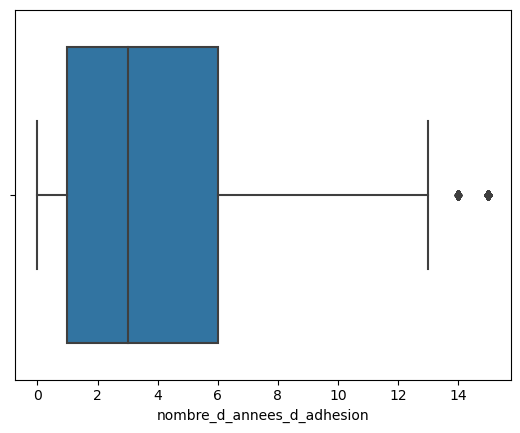

In [17]:
sns.boxplot(x='nombre_d_annees_d_adhesion', data=df)

<Axes: xlabel='nb_venues'>

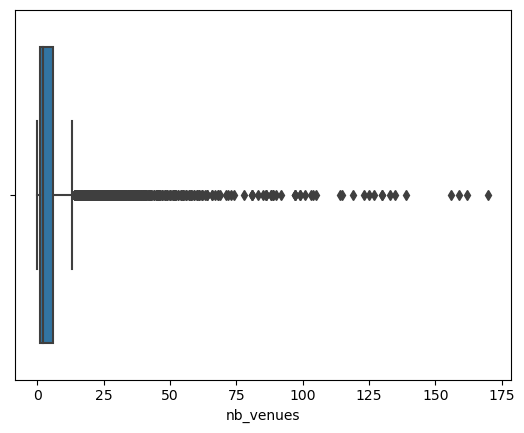

In [18]:
sns.boxplot(x='nb_venues', data=df)

<Axes: xlabel='nb_venues_postes_informatiques'>

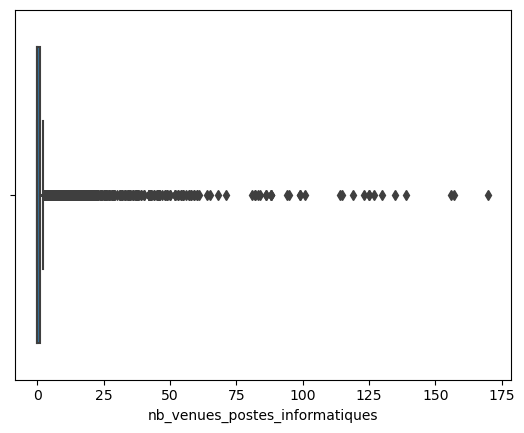

In [19]:
sns.boxplot(x='nb_venues_postes_informatiques', data=df)

<Axes: xlabel='nb_venues_prets'>

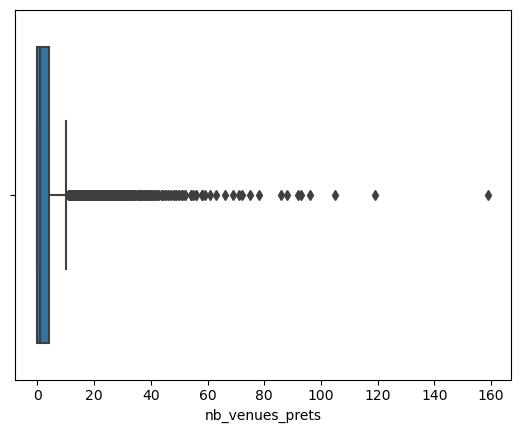

In [20]:
sns.boxplot(x='nb_venues_prets', data=df)

<Axes: xlabel='nb_venues_prets_bus'>

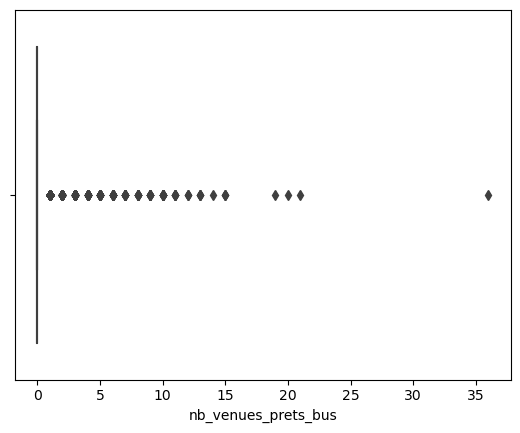

In [21]:
sns.boxplot(x='nb_venues_prets_bus', data=df)

<Axes: xlabel='nb_venues_prets_mediatheque'>

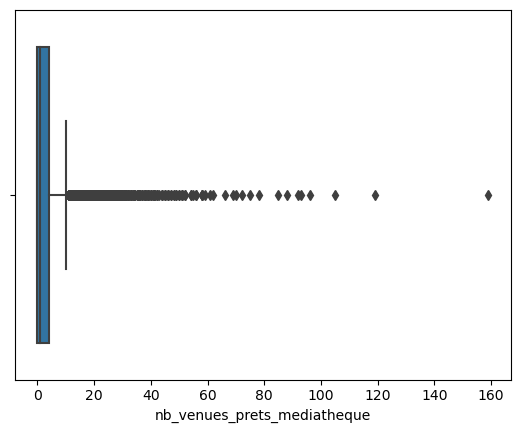

In [22]:
sns.boxplot(x='nb_venues_prets_mediatheque', data=df)

<Axes: xlabel='nb_venues_salle_etude'>

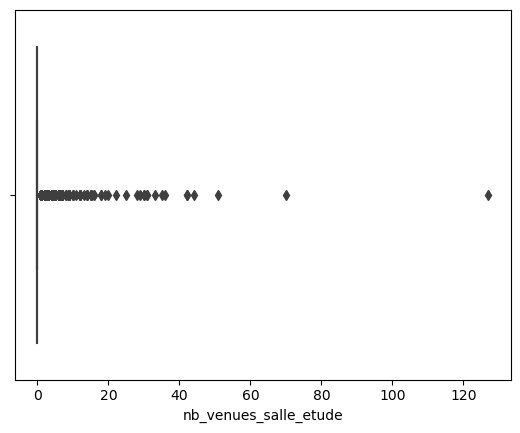

In [23]:
sns.boxplot(x='nb_venues_salle_etude', data=df)

<Axes: xlabel='nb_venues_wifi'>

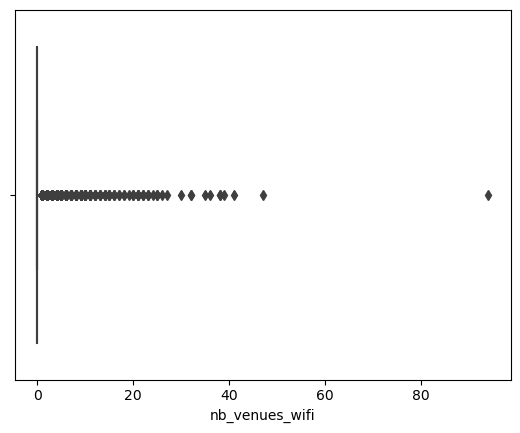

In [24]:
sns.boxplot(x='nb_venues_wifi', data=df)

In [25]:
# nb_venues : 
# Supression modalités > 150
df = df[df['nb_venues'] < 150]

In [26]:
# nb_venues_postes_informatiques : 
# Supression modalités >  150
df = df[df['nb_venues_postes_informatiques'] < 150]

In [27]:
# nb_venues_prets : 
# Supression modalités >  100
df = df[df['nb_venues_prets'] < 100]

In [28]:
# nb_venues_prets_bus : 
# Supression modalités >  35
df = df[df['nb_venues_prets_bus'] < 35]

In [29]:
# nb_venues_prets_mediatheque : 
# Supression modalités >  100
df = df[df['nb_venues_prets_mediatheque'] < 100]

In [30]:
# nb_venues_salle_etude : 
# Supression modalités >  40
df = df[df['nb_venues_salle_etude'] < 40]

In [31]:
# nb_venues_wifi : 
# Supression modalités >  40
df = df[df['nb_venues_wifi'] < 40]

In [32]:
df.shape

(11657, 26)

In [835]:
df.isnull().sum()

date_extraction                              0
activite                                     0
activite_emprunteur                          0
activite_emprunteur_bus                      0
activite_emprunteur_med                      0
activite_salle_etude                         0
activite_utilisateur_postes_informatiques    0
activite_utilisateur_wifi                    0
tranches_d_age_1                             0
tranches_d_age_2                             0
roubaisien_ou_non                            0
code_iris_de_roubaix                         0
nom_de_l_iris_a_roubaix                      0
commune_de_residence                         0
inscription_carte                            0
nombre_d_annees_d_adhesion                   7
type_inscription                             0
nb_venues                                    0
nb_venues_postes_informatiques               0
nb_venues_prets                              0
nb_venues_prets_bus                          0
nb_venues_pre

In [33]:
df.dropna(inplace = True)
df

,date_extraction,activite,activite_emprunteur,activite_emprunteur_bus,activite_emprunteur_med,activite_salle_etude,activite_utilisateur_postes_informatiques,activite_utilisateur_wifi,tranches_d_age_1,tranches_d_age_2,...,type_inscription,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi,sexe,geo_point_2d
0,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,25 - 64 ans,...,gratuite,9,0,9,0,9,0,0,Femme,Inconnu
1,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,15 - 24 ans,...,gratuite,5,0,5,0,5,0,0,Homme,"50.6992192099,3.16111509099"
2,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,<= 14 ans,0 - 14 ans,...,gratuite,1,0,1,0,1,0,0,Femme,"50.6838448476,3.20182368985"
3,2020,prêt + postes + wifi,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Utilisateur postes informatiques,Utilisateur Wifi,15 ans et plus,25 - 64 ans,...,payante,14,11,3,0,3,0,1,Femme,"50.6899026291,3.16585093674"
4,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,25 - 64 ans,...,gratuite,2,0,2,0,2,0,0,Homme,Inconnu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11668,2020,étude + postes,Non emprunteur,Non emprunteur Zèbre,Non emprunteur Médiathèque,Utilisateur Salle d'étude,Utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,25 - 64 ans,...,gratuite,26,26,0,0,0,2,0,Femme,Inconnu
11669,2020,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,<= 14 ans,0 - 14 ans,...,gratuite,4,0,4,0,4,0,0,Femme,"50.6826474805,3.18437265588"
11670,2020,postes,Non emprunteur,Non emprunteur Zèbre,Non emprunteur Médiathèque,Non utilisateur Salle d'étude,Utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,15 - 24 ans,...,gratuite,1,1,0,0,0,0,0,Femme,"50.6967838712,3.17302126792"
11671,2020,prêt + postes,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Utilisateur postes informatiques,Non utilisateur Wifi,15 ans et plus,25 - 64 ans,...,payante,12,1,12,0,12,0,0,Homme,"50.6992192099,3.16111509099"


In [34]:
df.shape

(11650, 26)

## 2 - Statistiques descriptives

### Statistiques univariées

#### date_extraction

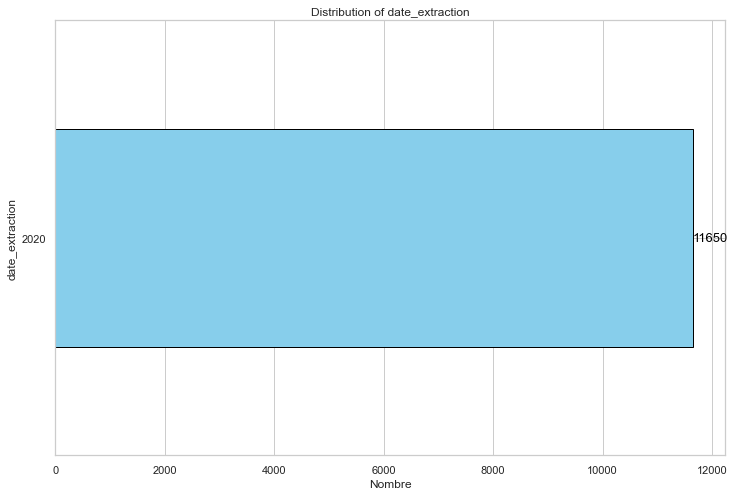

In [696]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):
"""
    Trace la distribution d'une variable catégorielle sous forme de diagramme en barres horizontales.

    Paramètres :
    - data : DataFrame contenant les données.
    - variable : Nom de la variable catégorielle à tracer.
    - color : Couleur des barres.
    - edgecolor : Couleur des bords des barres.
    - invert_yaxis : Si True, inverse l'axe y pour une meilleure lisibilité.
    - figsize : Taille de la figure.

    """
    # Compter les occurrences de chaque catégorie dans la variable spécifiée
    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution of {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'date_extraction', color='skyblue', edgecolor='black')

#### activite

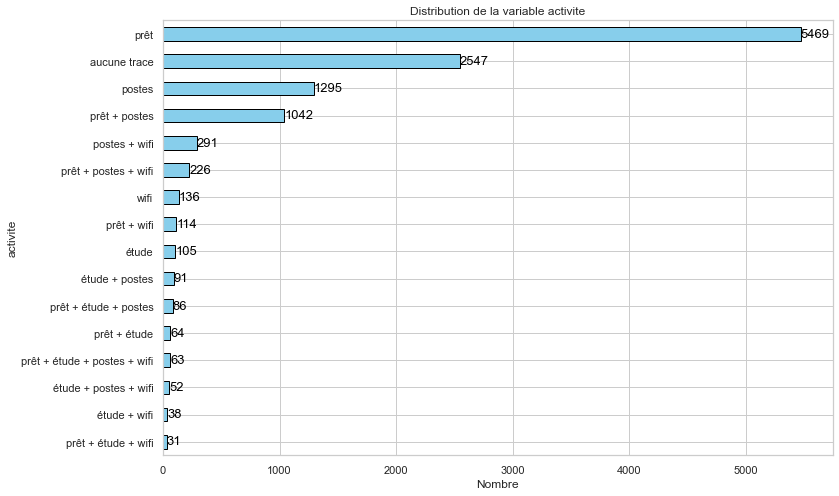

In [697]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'activite', color='skyblue', edgecolor='black')

#### activite_emprunteur

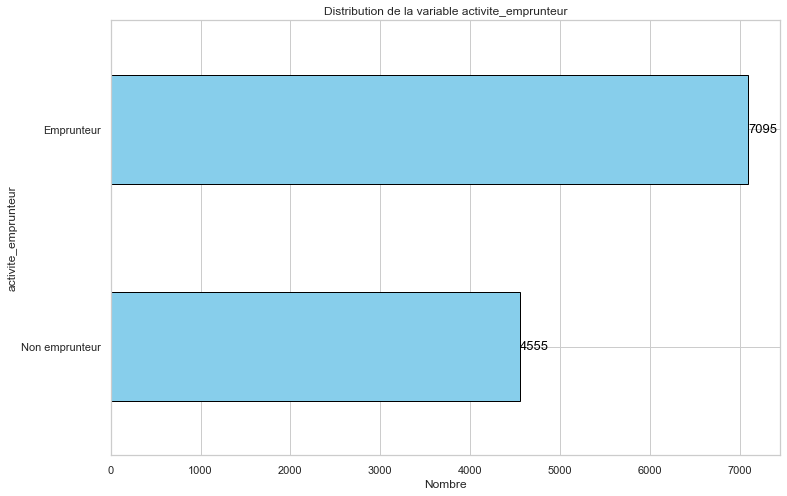

In [698]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'activite_emprunteur', color='skyblue', edgecolor='black')

#### activite_emprunteur_bus

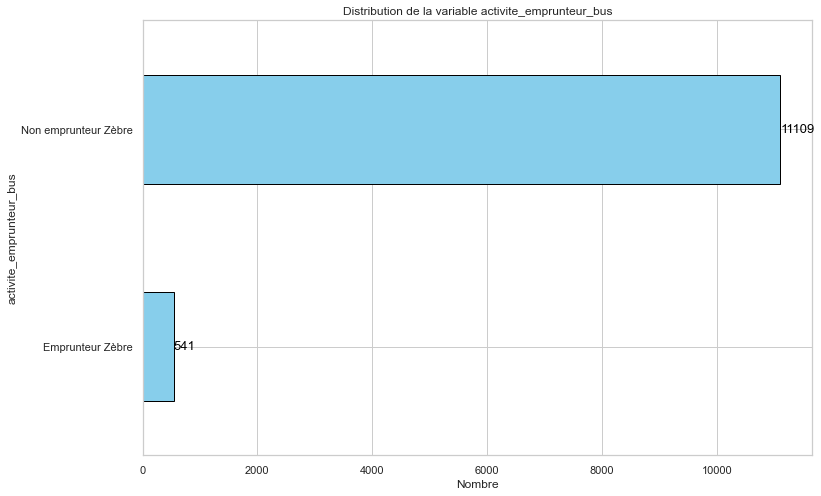

In [699]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'activite_emprunteur_bus', color='skyblue', edgecolor='black')

#### activite_emprunteur_med

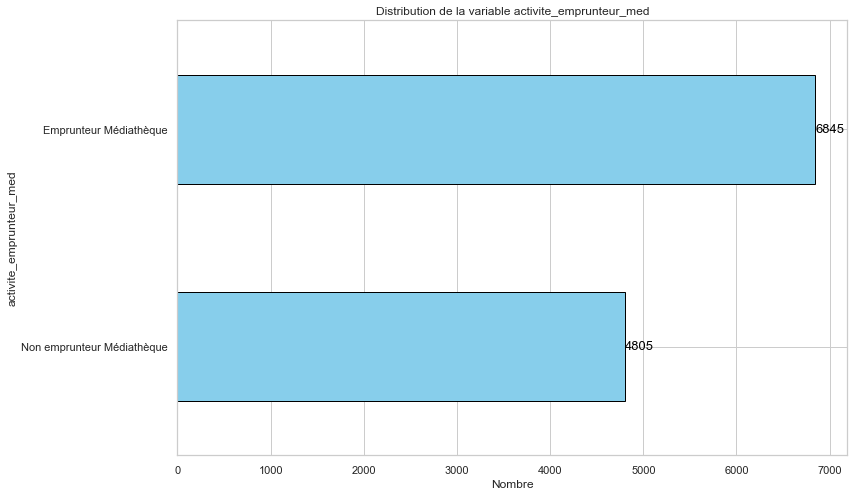

In [700]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'activite_emprunteur_med', color='skyblue', edgecolor='black')

#### activite_salle_etude

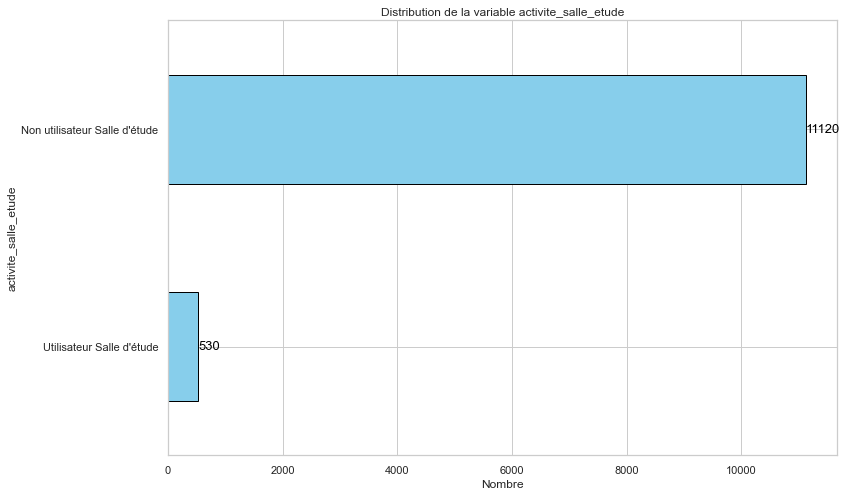

In [701]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'activite_salle_etude', color='skyblue', edgecolor='black')

#### activite_utilisateur_postes_informatiques

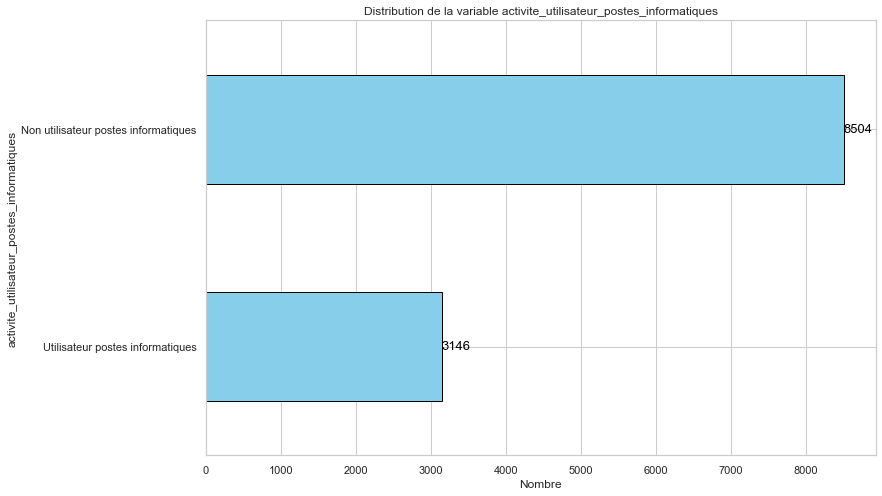

In [702]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'activite_utilisateur_postes_informatiques', color='skyblue', edgecolor='black')

#### activite_utilisateur_wifi

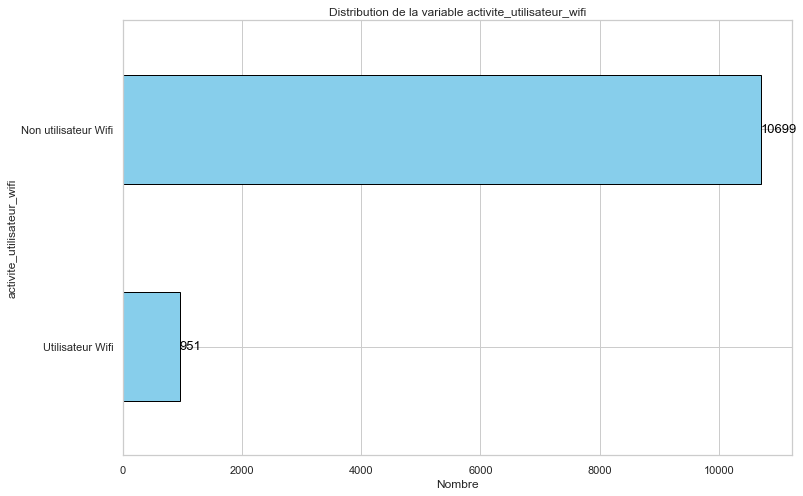

In [703]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'activite_utilisateur_wifi', color='skyblue', edgecolor='black')

#### tranches_d_age_1

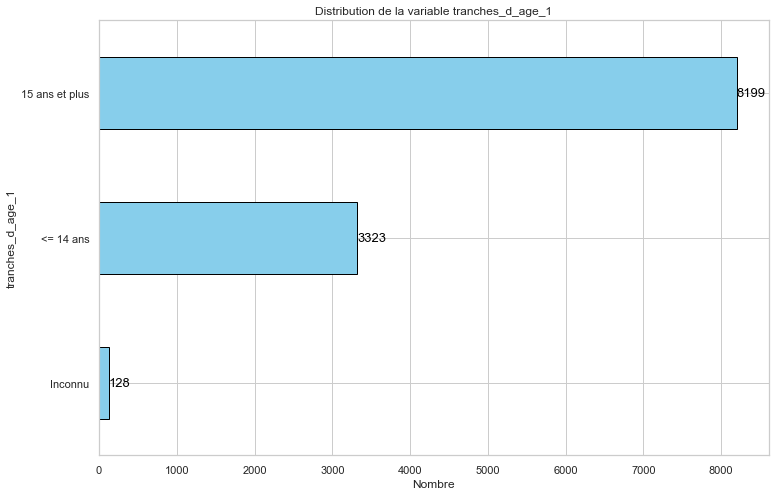

In [704]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'tranches_d_age_1', color='skyblue', edgecolor='black')

#### tranches_d_age_2

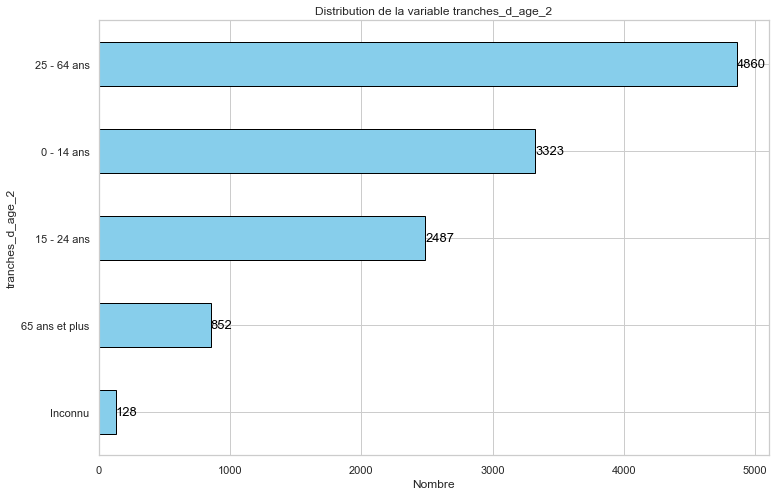

In [705]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'tranches_d_age_2', color='skyblue', edgecolor='black')

#### roubaisien_ou_non

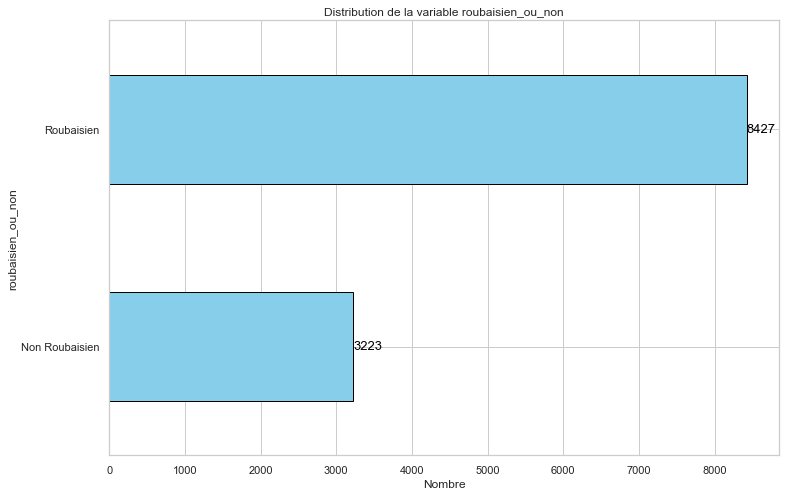

In [706]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'roubaisien_ou_non', color='skyblue', edgecolor='black')

#### code_iris_de_roubaix

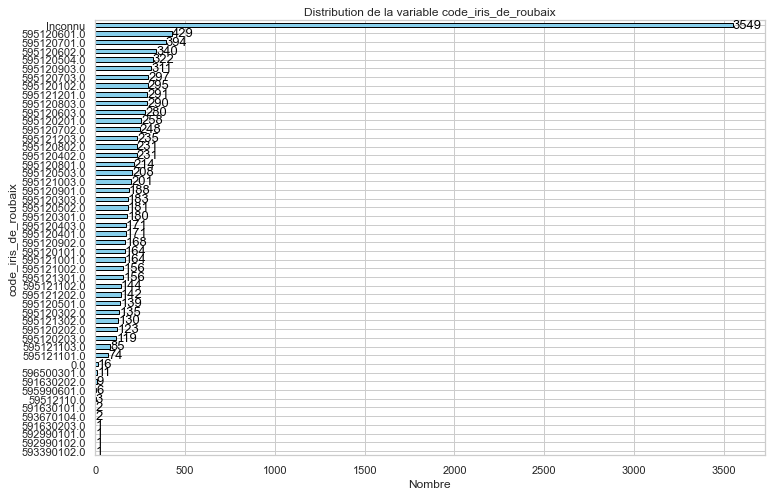

In [707]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'code_iris_de_roubaix', color='skyblue', edgecolor='black')

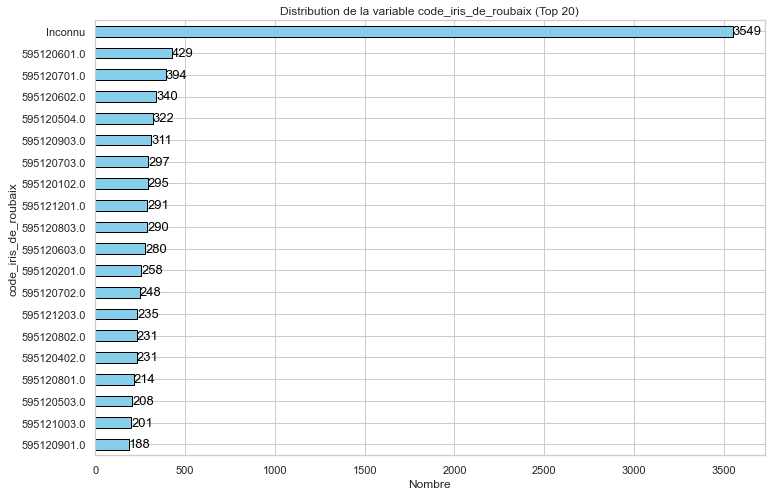

In [708]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, top_n=20, figsize=(12, 8)):
    tab = data[variable].value_counts().nlargest(top_n)  # Selectionner le top 20
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable} (Top {top_n})') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

# Example usage
plot_categorical_distribution(df, 'code_iris_de_roubaix', color='skyblue', edgecolor='black', top_n=20)


#### nom_de_l_iris_a_roubaix

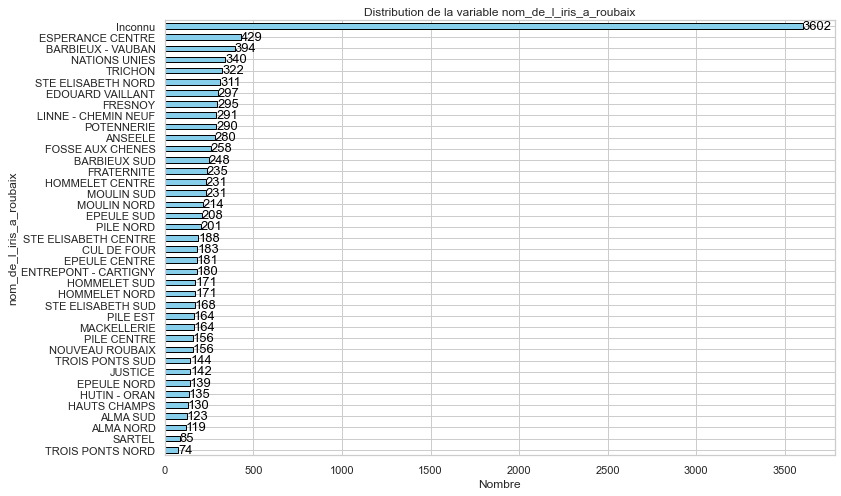

In [709]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'nom_de_l_iris_a_roubaix', color='skyblue', edgecolor='black')

#### commune_de_residence

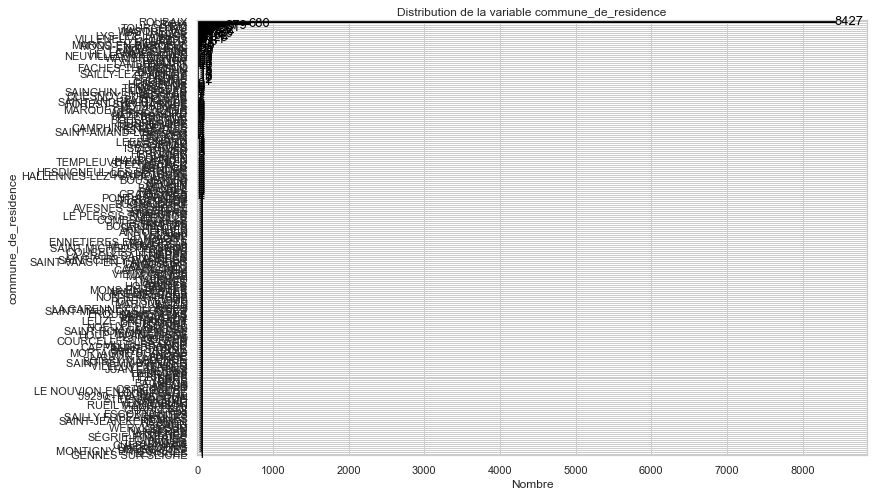

In [710]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'commune_de_residence', color='skyblue', edgecolor='black')

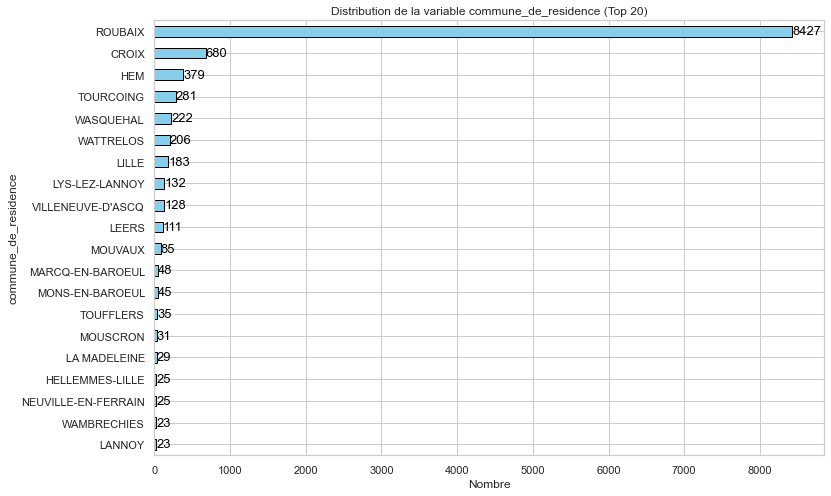

In [711]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, top_n=20, figsize=(12, 8)):
    tab = data[variable].value_counts().nlargest(top_n)  # Selectionner le top 20
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable} (Top {top_n})') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

# Example usage
plot_categorical_distribution(df, 'commune_de_residence', color='skyblue', edgecolor='black', top_n=20)


#### inscription_carte

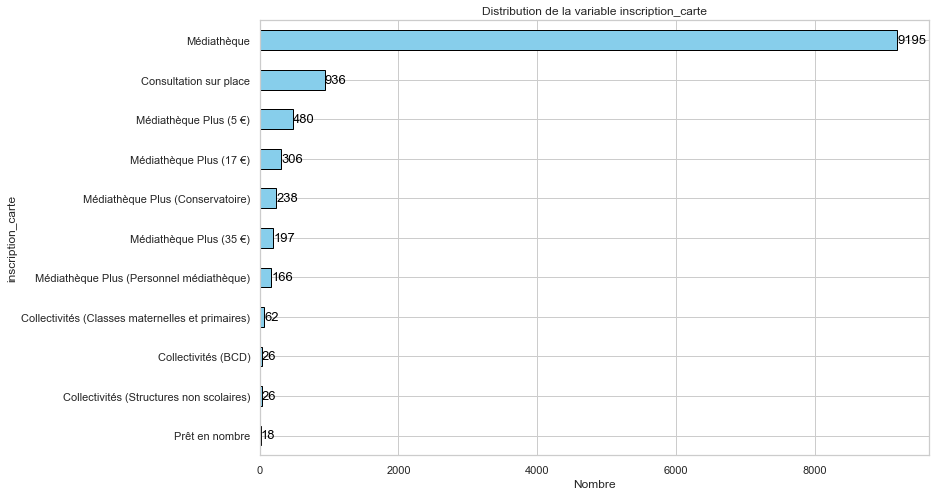

In [712]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'inscription_carte', color='skyblue', edgecolor='black')

#### nombre_d_annees_d_adhesion

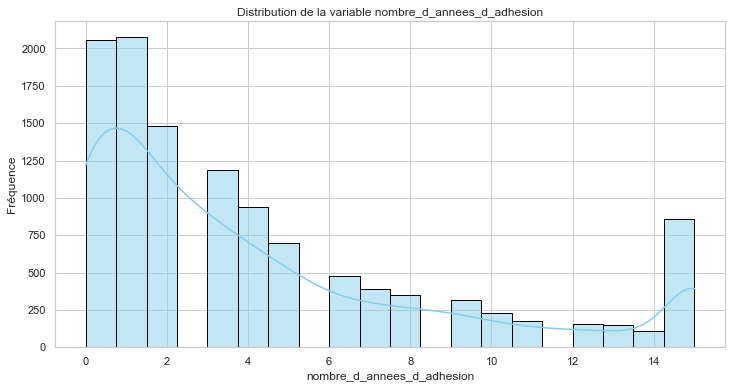

In [713]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(data, variable, bins=20, color='skyblue', edgecolor='black', figsize=(12, 6)):
    """
    Trace la distribution d'une variable numérique sous forme d'histogramme avec une estimation de la densité.

    Paramètres :
    - data : DataFrame contenant les données.
    - variable : Nom de la variable numérique à tracer.
    - bins : Nombre de bacs (intervales) pour l'histogramme.
    - color : Couleur des barres de l'histogramme.
    - edgecolor : Couleur des bords des barres de l'histogramme.
    - figsize : Taille de la figure.

    """
    plt.figure(figsize=figsize)
    
    sns.set(style="whitegrid")
    
    sns.histplot(data[variable], bins=bins, kde=True, color=color, edgecolor=edgecolor)
    
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de la variable {variable}')
    
    plt.show()

plot_numeric_distribution(df, 'nombre_d_annees_d_adhesion', color='skyblue', edgecolor='black')

#### type_inscription

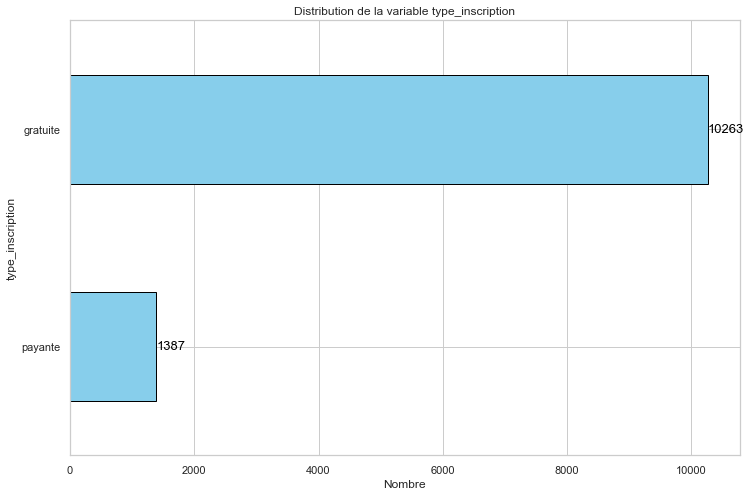

In [714]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'type_inscription', color='skyblue', edgecolor='black')

#### nb_venues

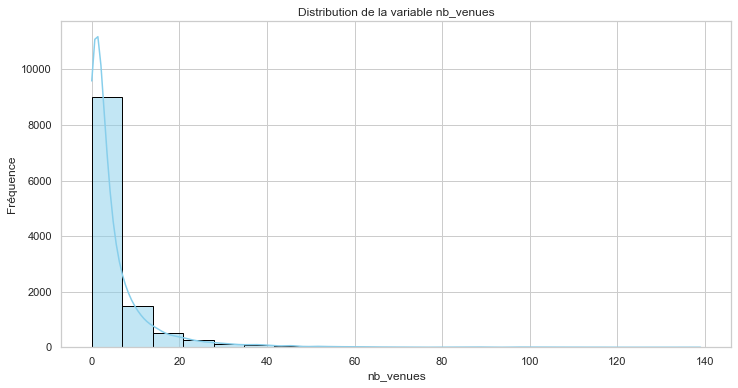

In [715]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(data, variable, bins=20, color='skyblue', edgecolor='black', figsize=(12, 6)):
    plt.figure(figsize=figsize)
    
    sns.set(style="whitegrid")
    
    sns.histplot(data[variable], bins=bins, kde=True, color=color, edgecolor=edgecolor)
    
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de la variable {variable}')
    
    plt.show()

# Example usage
plot_numeric_distribution(df, 'nb_venues', color='skyblue', edgecolor='black')

#### nb_venues_postes_informatiques

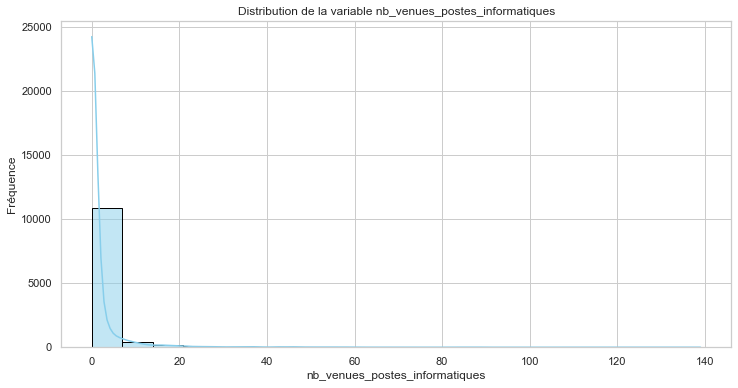

In [716]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(data, variable, bins=20, color='skyblue', edgecolor='black', figsize=(12, 6)):
    plt.figure(figsize=figsize)
    
    sns.set(style="whitegrid")
    
    sns.histplot(data[variable], bins=bins, kde=True, color=color, edgecolor=edgecolor)
    
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de la variable {variable}')
    
    plt.show()

# Example usage
plot_numeric_distribution(df, 'nb_venues_postes_informatiques', color='skyblue', edgecolor='black')

#### nb_venues_prets

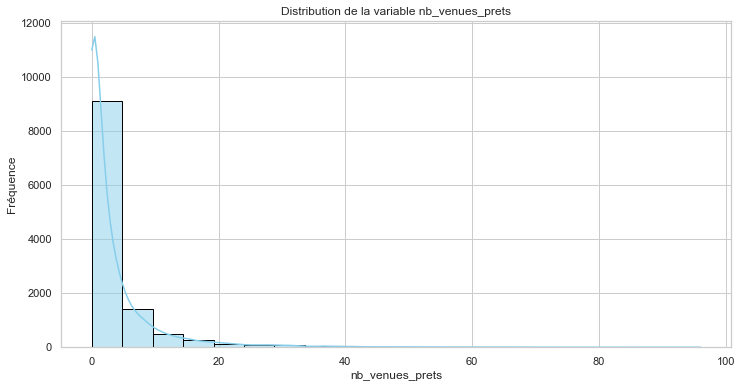

In [717]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(data, variable, bins=20, color='skyblue', edgecolor='black', figsize=(12, 6)):
    plt.figure(figsize=figsize)
    
    sns.set(style="whitegrid")
    
    sns.histplot(data[variable], bins=bins, kde=True, color=color, edgecolor=edgecolor)
    
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de la variable {variable}')
    
    plt.show()

# Example usage
plot_numeric_distribution(df, 'nb_venues_prets', color='skyblue', edgecolor='black')

#### nb_venues_prets_bus

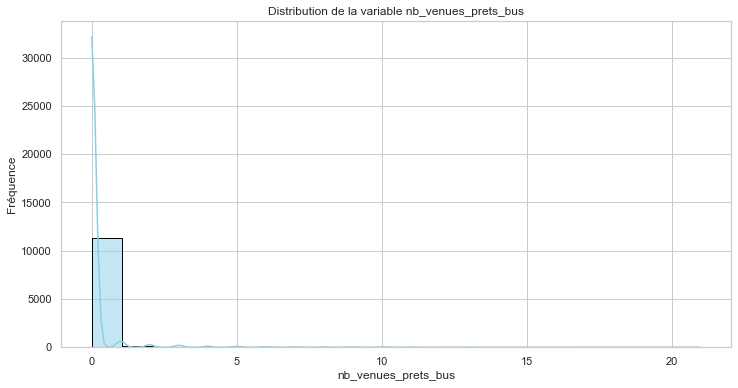

In [718]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(data, variable, bins=20, color='skyblue', edgecolor='black', figsize=(12, 6)):
    plt.figure(figsize=figsize)
    
    sns.set(style="whitegrid")
    
    sns.histplot(data[variable], bins=bins, kde=True, color=color, edgecolor=edgecolor)
    
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de la variable {variable}')
    
    plt.show()

# Example usage
plot_numeric_distribution(df, 'nb_venues_prets_bus', color='skyblue', edgecolor='black')

#### nb_venues_prets_mediatheque

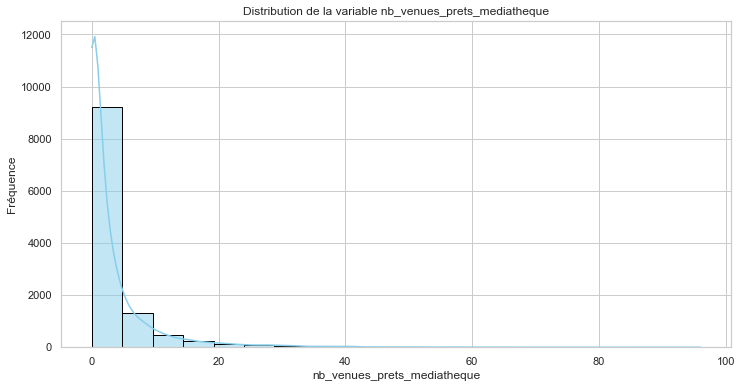

In [719]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(data, variable, bins=20, color='skyblue', edgecolor='black', figsize=(12, 6)):
    plt.figure(figsize=figsize)
    
    sns.set(style="whitegrid")
    
    sns.histplot(data[variable], bins=bins, kde=True, color=color, edgecolor=edgecolor)
    
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de la variable {variable}')
    
    plt.show()

# Example usage
plot_numeric_distribution(df, 'nb_venues_prets_mediatheque', color='skyblue', edgecolor='black')

#### nb_venues_salle_etude

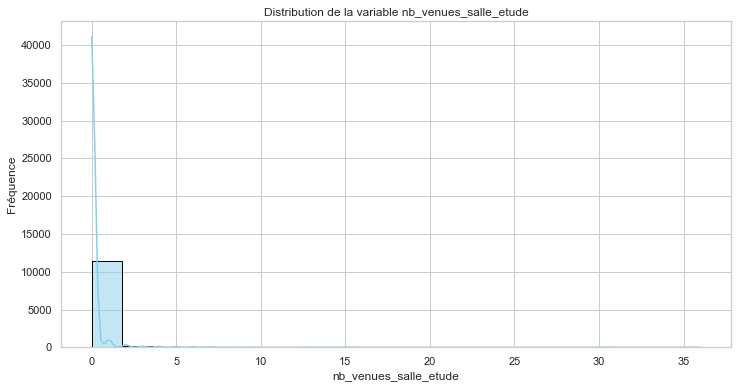

In [720]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(data, variable, bins=20, color='skyblue', edgecolor='black', figsize=(12, 6)):
    plt.figure(figsize=figsize)
    
    sns.set(style="whitegrid")
    
    sns.histplot(data[variable], bins=bins, kde=True, color=color, edgecolor=edgecolor)
    
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de la variable {variable}')
    
    plt.show()

# Example usage
plot_numeric_distribution(df, 'nb_venues_salle_etude', color='skyblue', edgecolor='black')

#### nb_venues_wifi

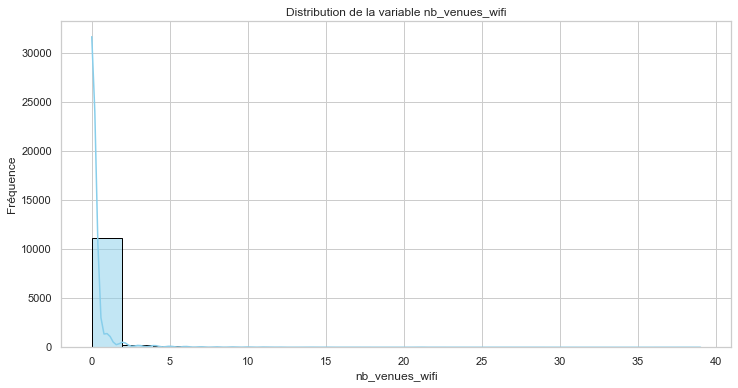

In [721]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(data, variable, bins=20, color='skyblue', edgecolor='black', figsize=(12, 6)):
    plt.figure(figsize=figsize)
    
    sns.set(style="whitegrid")
    
    sns.histplot(data[variable], bins=bins, kde=True, color=color, edgecolor=edgecolor)
    
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de la variable {variable}')
    
    plt.show()

# Example usage
plot_numeric_distribution(df, 'nb_venues_wifi', color='skyblue', edgecolor='black')

#### sexe

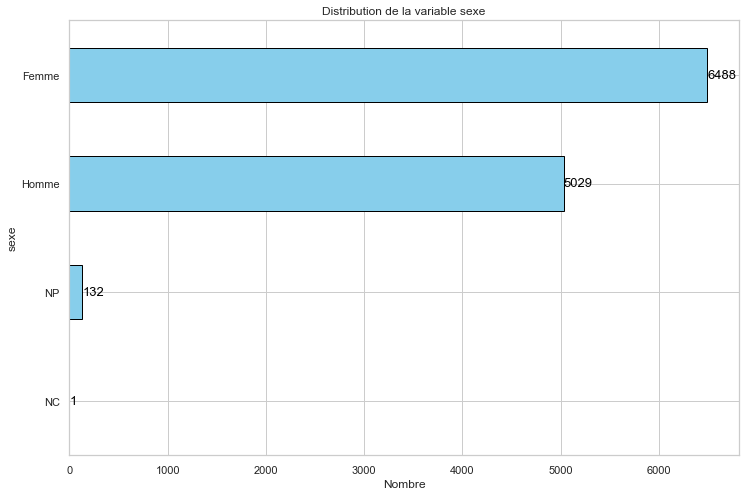

In [722]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'sexe', color='skyblue', edgecolor='black')

#### geo_point_2d

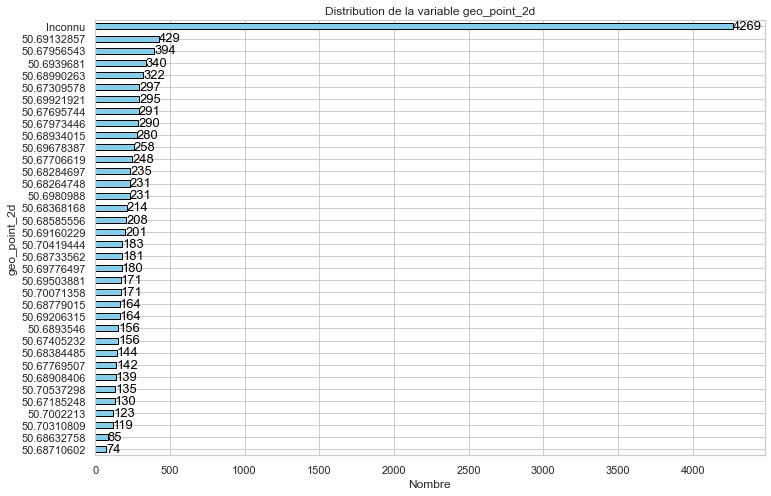

In [723]:
def plot_categorical_distribution(data, variable, color='skyblue', edgecolor='black', invert_yaxis=True, figsize=(12, 8)):

    tab = data[variable].value_counts()
    
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = tab.plot(kind='barh', color=color, edgecolor=edgecolor) 
    plt.xlabel('Nombre')  
    plt.ylabel(variable)  
    plt.title(f'Distribution de la variable {variable}') 

    for index, value in enumerate(tab):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=13, color='black')

    if invert_yaxis:
        plt.gca().invert_yaxis()

    plt.show()

plot_categorical_distribution(df, 'geo_point_2d', color='skyblue', edgecolor='black')

In [838]:
# Supression variable date_extraction car une seule modalité

print(f"Number of columns before deleting: {df.shape[1]}")

del_cols = ['date_extraction']
df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 26
Number of columns after deleting: 25


In [839]:
print(df.columns)

Index(['activite', 'activite_emprunteur', 'activite_emprunteur_bus',
       'activite_emprunteur_med', 'activite_salle_etude',
       'activite_utilisateur_postes_informatiques',
       'activite_utilisateur_wifi', 'tranches_d_age_1', 'tranches_d_age_2',
       'roubaisien_ou_non', 'code_iris_de_roubaix', 'nom_de_l_iris_a_roubaix',
       'commune_de_residence', 'inscription_carte',
       'nombre_d_annees_d_adhesion', 'type_inscription', 'nb_venues',
       'nb_venues_postes_informatiques', 'nb_venues_prets',
       'nb_venues_prets_bus', 'nb_venues_prets_mediatheque',
       'nb_venues_salle_etude', 'nb_venues_wifi', 'sexe', 'geo_point_2d'],
      dtype='object')


### Analyse croisée

#### tranches_d_age_2 et activite_emprunteur

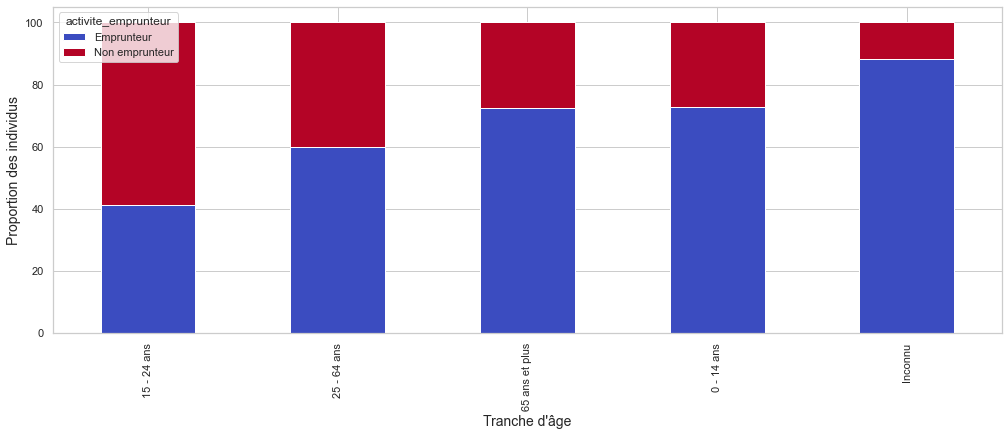

In [726]:
table_country = pd.crosstab(df['tranches_d_age_2'], df['activite_emprunteur'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = 'Emprunteur').plot(kind = 'bar',
                                                                                             stacked = True,
                                                                                              figsize = (17,6),
                                                                                             cmap='coolwarm');
plt.xlabel("Tranche d'âge",fontsize = 14);
plt.ylabel('Proportion des individus',fontsize = 14);

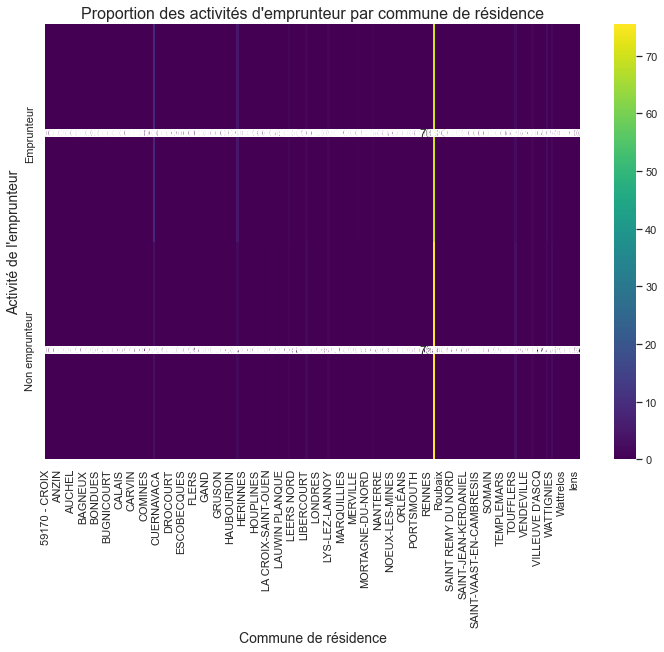

In [730]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

table_country = pd.crosstab(df['activite_emprunteur'], df['commune_de_residence'])
proportions = (table_country.div(table_country.sum(axis=1), axis=0) * 100).sort_values(by='activite_emprunteur')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(proportions, annot=True, fmt=".2f", cmap='viridis')

# Customize the plot
plt.xlabel('Commune de résidence', fontsize=14)
plt.ylabel('Activité de l\'emprunteur', fontsize=14)
plt.title('Proportion des activités d\'emprunteur par commune de résidence', fontsize=16)

plt.show()

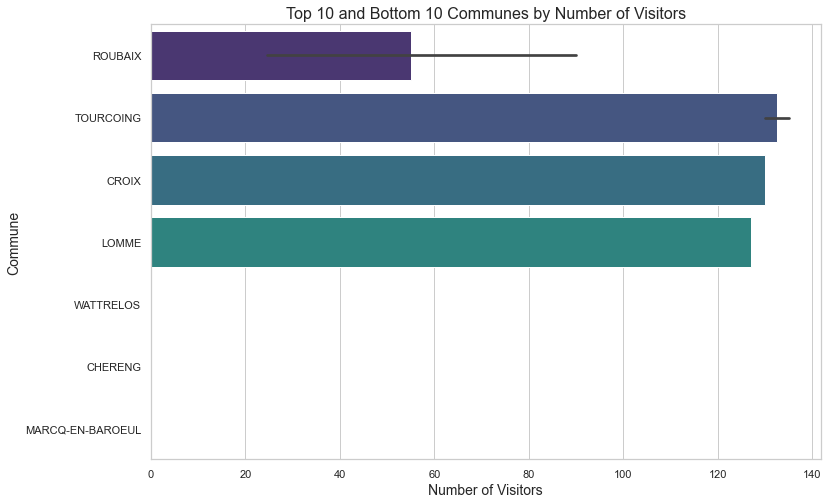

In [732]:
df = df.sort_values(by='nb_venues', ascending=False)

# Define the number of top and bottom communes to display
top_x = 10
bottom_x = 10

# Select the top and bottom X communes
df_selected = pd.concat([df.head(top_x), df.tail(bottom_x)])

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='nb_venues', y='commune_de_residence', data=df_selected, palette='viridis')

# Customize the plot
plt.xlabel('Number of Visitors', fontsize=14)
plt.ylabel('Commune', fontsize=14)
plt.title(f'Top {top_x} and Bottom {bottom_x} Communes by Number of Visitors', fontsize=16)

plt.show()

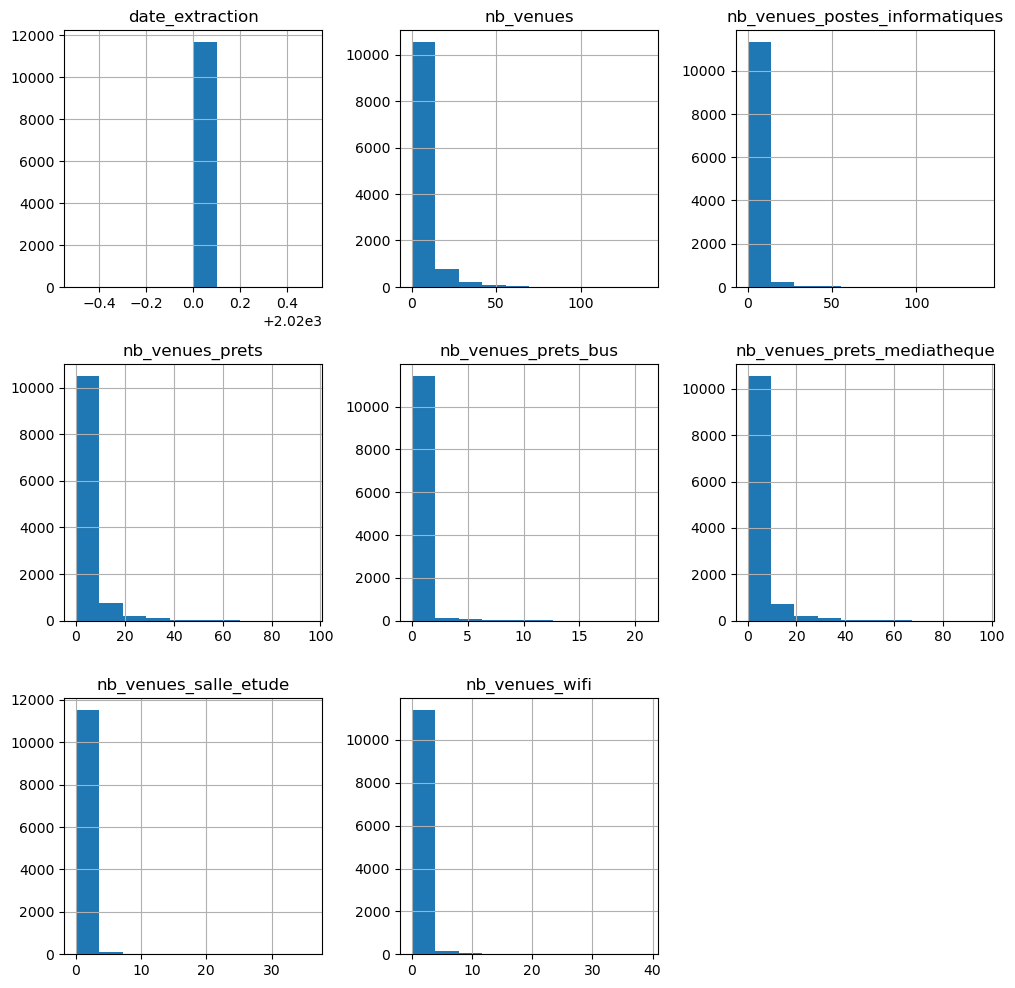

In [35]:
df[list(num_col.index)].hist(figsize = (12,12));

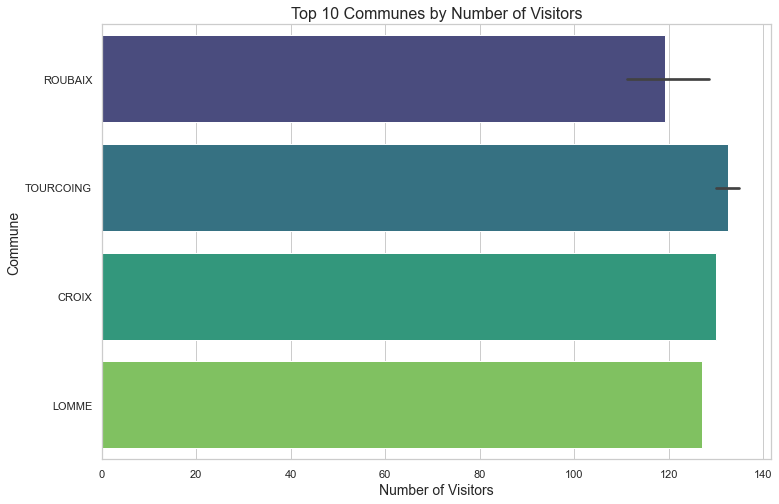

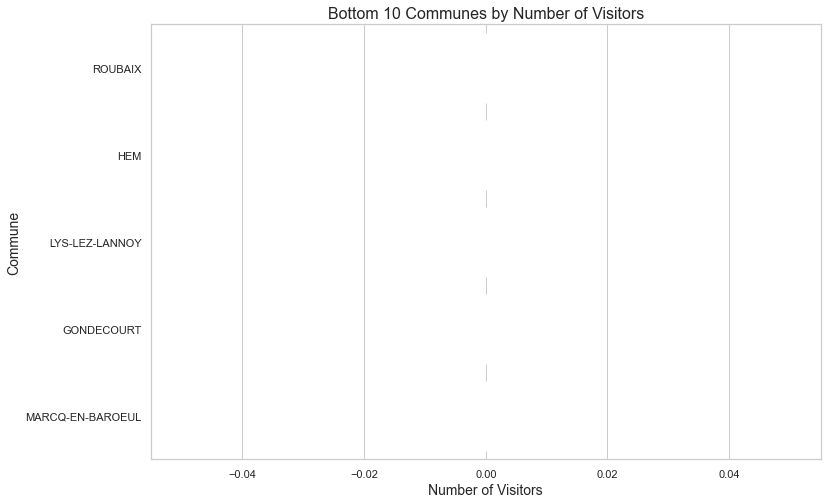

In [733]:
df = df.sort_values(by='nb_venues', ascending=False)

# Define the number of top and bottom communes to display
top_x = 10
bottom_x = 10

# Select the top and bottom X communes
df_top = df.head(top_x)
df_bottom = df.tail(bottom_x)

# Plot for the top communes
plt.figure(figsize=(12, 8))
sns.barplot(x='nb_venues', y='commune_de_residence', data=df_top, palette='viridis')
plt.xlabel('Number of Visitors', fontsize=14)
plt.ylabel('Commune', fontsize=14)
plt.title(f'Top {top_x} Communes by Number of Visitors', fontsize=16)
plt.show()

# Plot for the bottom communes
plt.figure(figsize=(12, 8))
sns.barplot(x='nb_venues', y='commune_de_residence', data=df_bottom, palette='viridis')
plt.xlabel('Number of Visitors', fontsize=14)
plt.ylabel('Commune', fontsize=14)
plt.title(f'Bottom {bottom_x} Communes by Number of Visitors', fontsize=16)
plt.show()

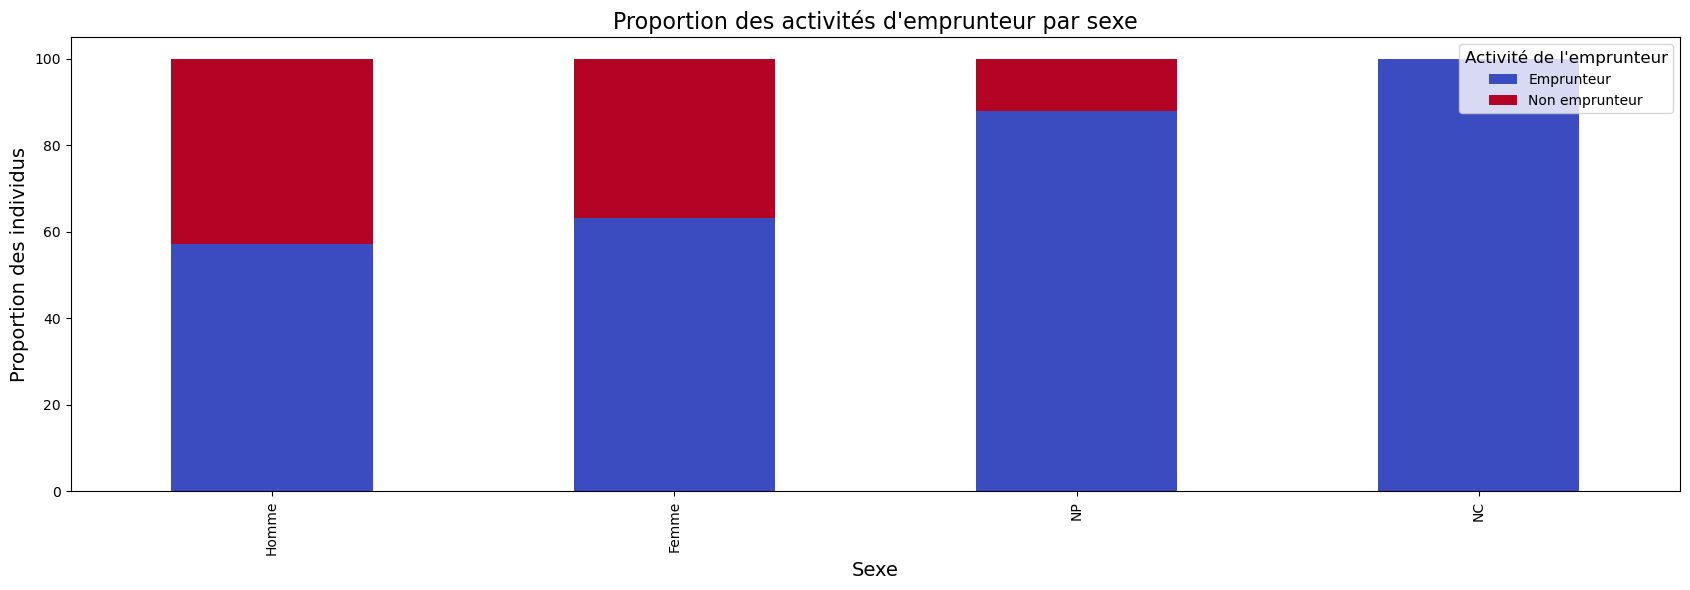

In [36]:
fig, ax = plt.subplots(figsize=(17, 6))

table_country = pd.crosstab(df['sexe'], df['activite_emprunteur'])
(table_country.div(table_country.sum(axis=1), axis=0) * 100).sort_values(by='Emprunteur').plot(
    kind='bar', stacked=True, cmap='coolwarm', ax=ax
)

ax.set_xlabel("Sexe", fontsize=14)
ax.set_ylabel('Proportion des individus', fontsize=14)
ax.set_title('Proportion des activités d\'emprunteur par sexe', fontsize=16)
ax.legend(title='Activité de l\'emprunteur', title_fontsize='12', loc='upper right')

plt.tight_layout()

plt.show()

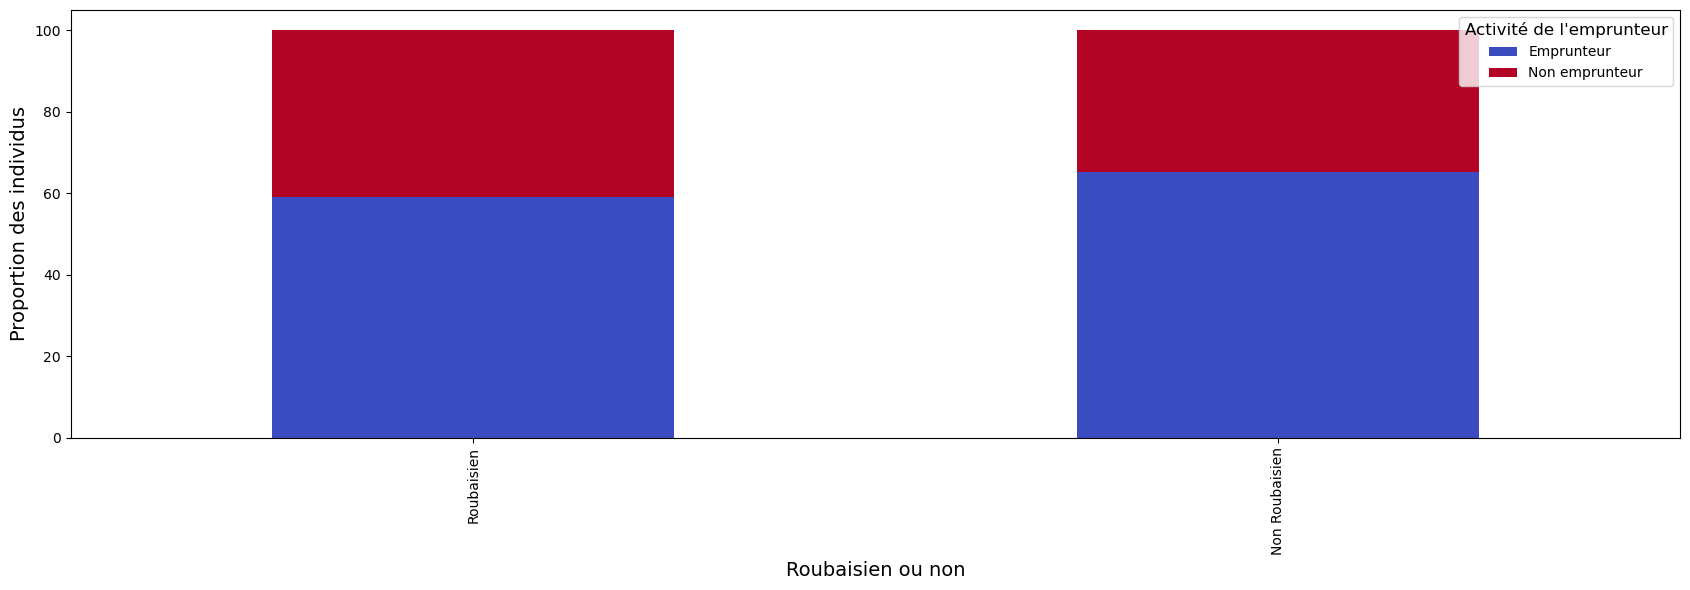

In [39]:
fig, ax = plt.subplots(figsize=(17, 6))

table_country = pd.crosstab(df['roubaisien_ou_non'], df['activite_emprunteur'])
(table_country.div(table_country.sum(axis=1), axis=0) * 100).sort_values(by='Emprunteur').plot(
    kind='bar', stacked=True, cmap='coolwarm', ax=ax
)

ax.set_xlabel("Roubaisien ou non", fontsize=14)
ax.set_ylabel('Proportion des individus', fontsize=14)
ax.legend(title='Activité de l\'emprunteur', title_fontsize='12', loc='upper right')

plt.tight_layout()

plt.show()

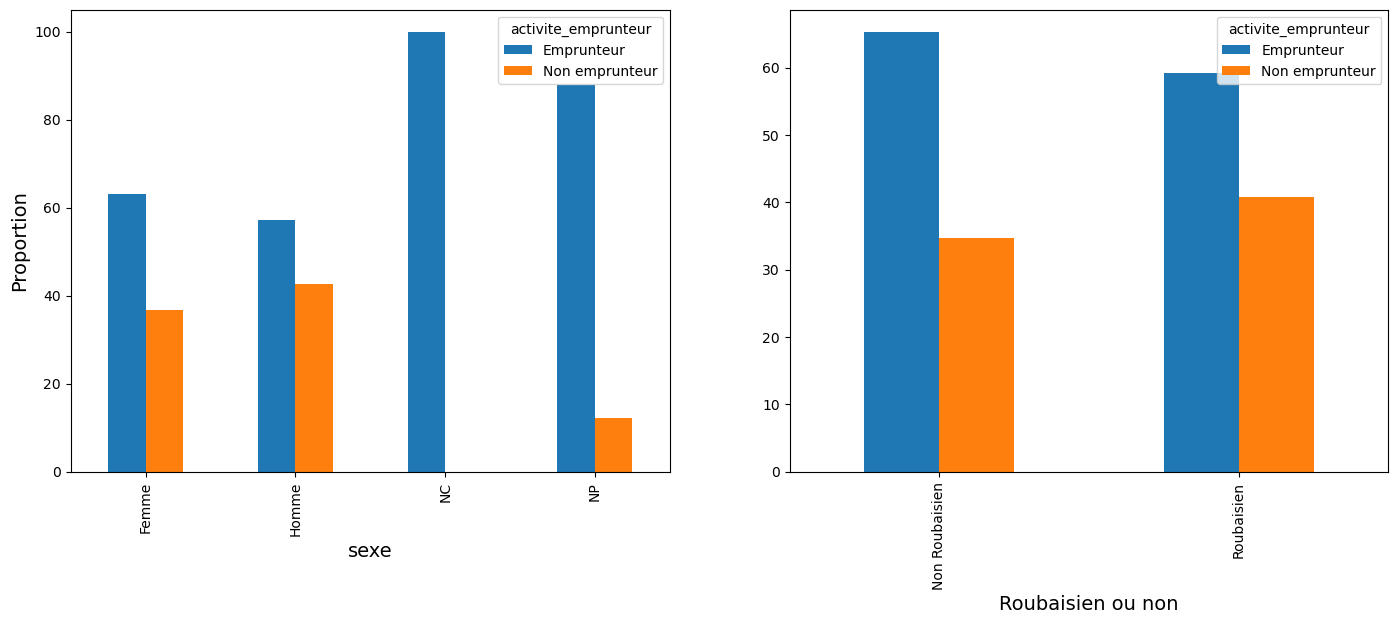

In [40]:
table_sexe = pd.crosstab(df['sexe'], df['activite_emprunteur'])
table_roubaix = pd.crosstab(df['roubaisien_ou_non'], df['activite_emprunteur'])
table_age = pd.crosstab(df['tranches_d_age_2'], df['activite_emprunteur'])
table_carte = pd.crosstab(df['inscription_carte'],df['activite_emprunteur'])
table_annee = pd.crosstab(df['nombre_d_annees_d_adhesion'], df['activite_emprunteur'])
table_inscription = pd.crosstab(df['type_inscription'],df['activite_emprunteur'])
table_commune = pd.crosstab(df['commune_de_residence'], df['activite_emprunteur'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_sexe.div(table_sexe.sum(axis= 1),axis = 0)*100).plot(kind = 'bar',ax=ax);
plt.xlabel("sexe",fontsize = 14);
plt.ylabel('Proportion',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_roubaix.div(table_roubaix.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax=ax);
plt.xlabel("Roubaisien ou non",fontsize = 14);

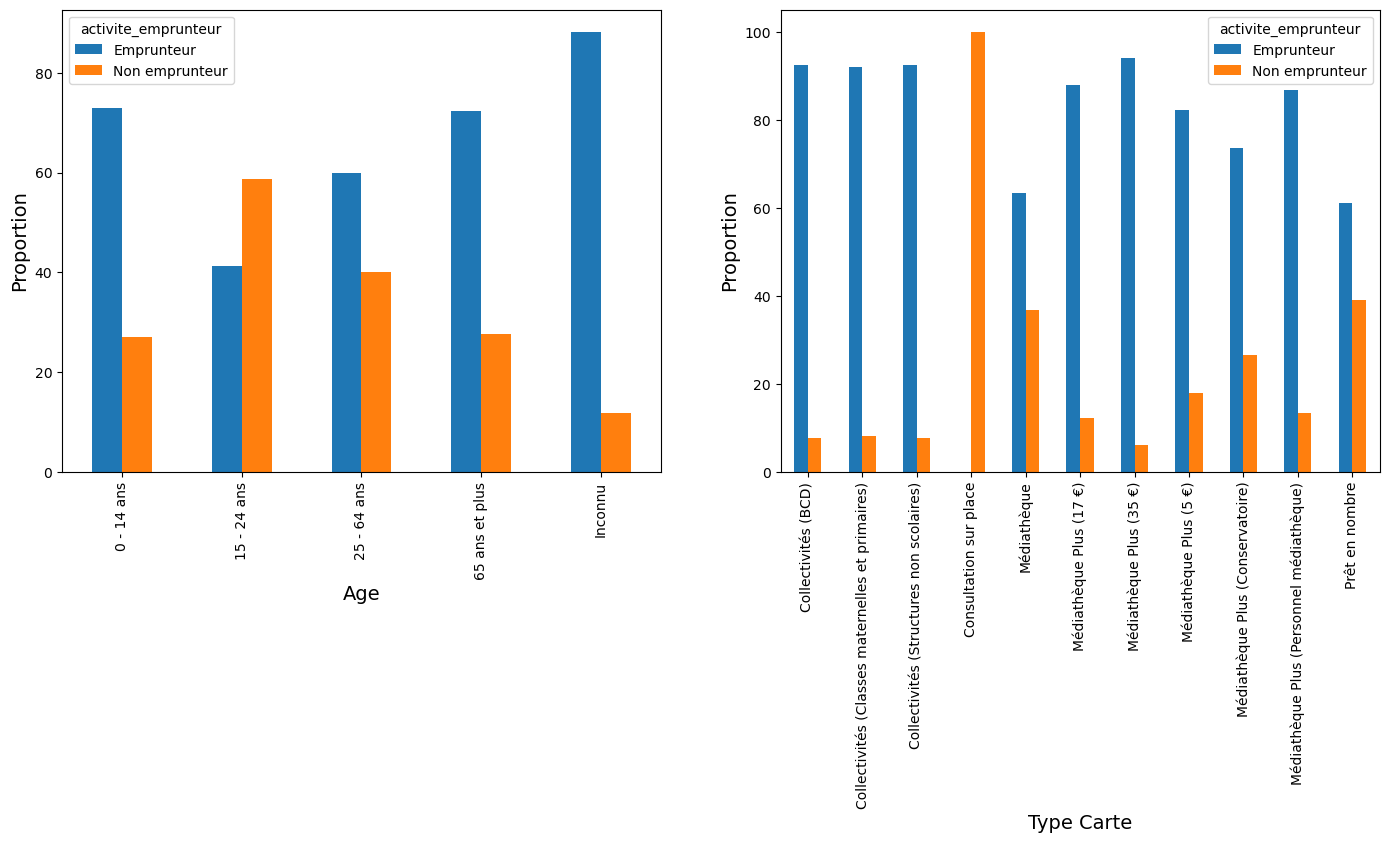

In [41]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_age.div(table_age.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax =ax);
plt.xlabel('Age',fontsize = 14);
plt.ylabel('Proportion',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_carte.div(table_carte.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax = ax);
plt.xlabel('Type Carte',fontsize = 14);
plt.ylabel('Proportion',fontsize = 14);

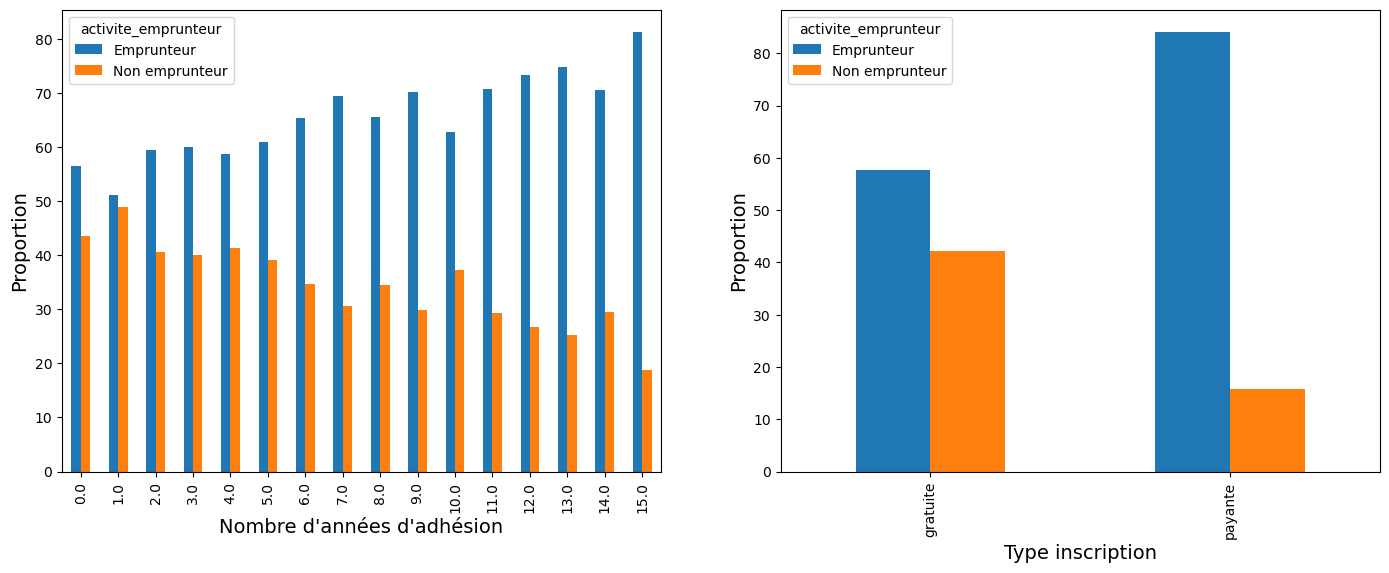

In [42]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_annee.div(table_annee.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax =ax);
plt.xlabel('Nombre d\'années d\'adhésion',fontsize = 14);
plt.ylabel('Proportion',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_inscription.div(table_inscription.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax =ax);
plt.xlabel('Type inscription',fontsize = 14);
plt.ylabel('Proportion',fontsize = 14);

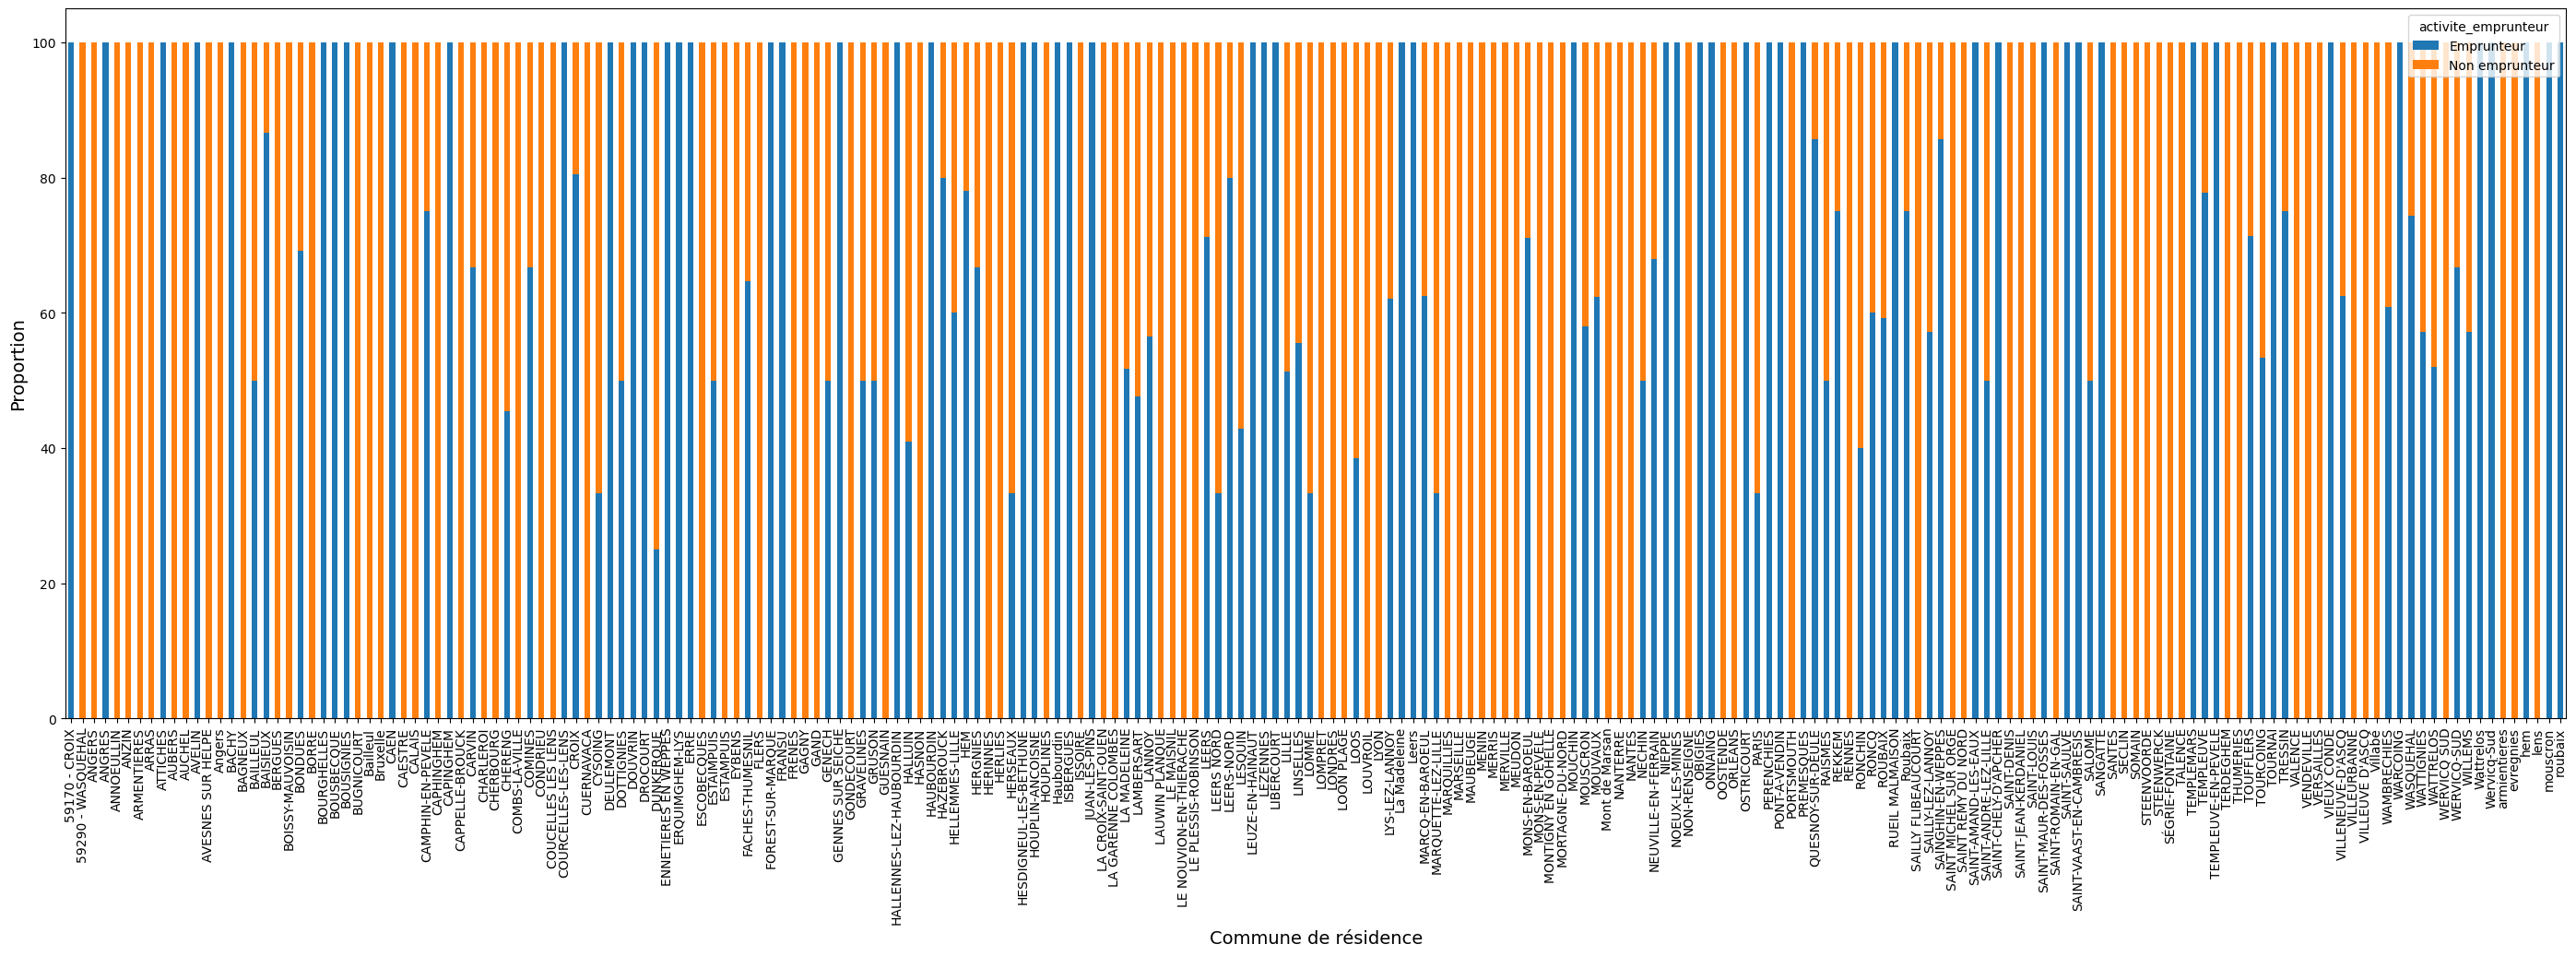

In [43]:
(table_commune.div(table_commune.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',stacked = True,figsize = (35,10));
plt.xlabel('Commune de résidence',fontsize = 14);
plt.ylabel('Proportion',fontsize = 14);

#### nb_venues_prets et activite_emprunteur - mais pas interessant

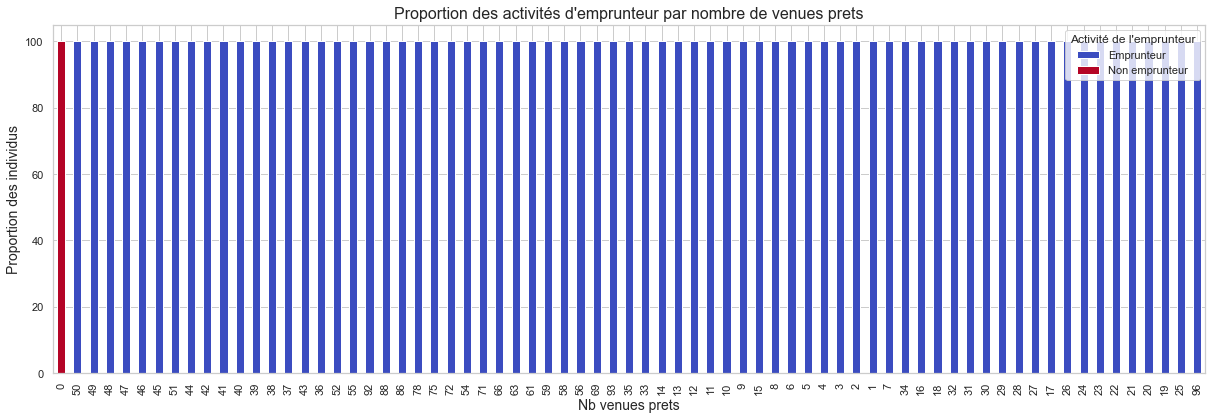

In [734]:
fig, ax = plt.subplots(figsize=(17, 6))

table_country = pd.crosstab(df['nb_venues_prets'], df['activite_emprunteur'])
(table_country.div(table_country.sum(axis=1), axis=0) * 100).sort_values(by='Emprunteur').plot(
    kind='bar', stacked=True, cmap='coolwarm', ax=ax
)

ax.set_xlabel("Nb venues prets", fontsize=14)
ax.set_ylabel('Proportion des individus', fontsize=14)
ax.set_title('Proportion des activités d\'emprunteur par nombre de venues prets', fontsize=16)
ax.legend(title='Activité de l\'emprunteur', title_fontsize='12', loc='upper right')

plt.tight_layout()

plt.show()

## 3 - Liaison entre les variables

#### Matrice de corrélation

In [840]:
# Séparation variables numériques et qualitative
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

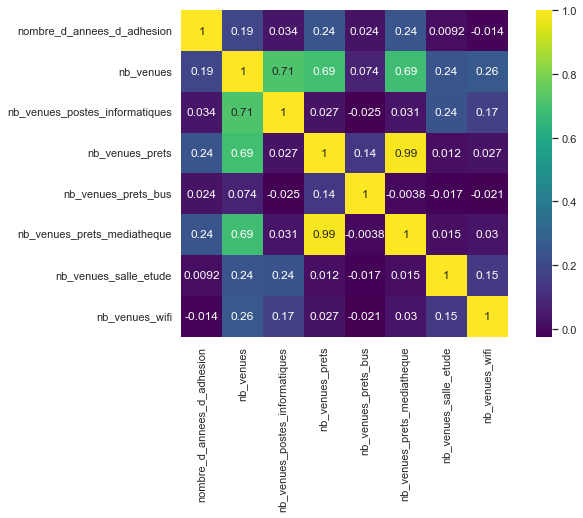

In [841]:
fig = plt.figure(figsize=(10, 6))

# Choisir une palette de couleurs (colormap)
cmap = 'viridis'

'''Ajouter des annotations pour afficher les valeurs de corrélation sur la carte thermique
(annot=True affiche les valeurs)
(square=True assure que les cellules sont carrées)
(cmap spécifie la palette de couleurs) '''

# Tracer une carte thermique (heatmap) de la corrélation entre les variables numériques
sns.heatmap(df[list(num_col.index)].corr(), annot=True, square=True, cmap=cmap)

#### V de Cramer

In [842]:
import sklearn 
import matplotlib.pyplot as plt 
import scipy.stats as ss
from scipy.stats import chi2_contingency
from matplotlib.colors import to_hex
from seaborn import color_palette

In [843]:
print(df.columns)

Index(['activite', 'activite_emprunteur', 'activite_emprunteur_bus',
       'activite_emprunteur_med', 'activite_salle_etude',
       'activite_utilisateur_postes_informatiques',
       'activite_utilisateur_wifi', 'tranches_d_age_1', 'tranches_d_age_2',
       'roubaisien_ou_non', 'code_iris_de_roubaix', 'nom_de_l_iris_a_roubaix',
       'commune_de_residence', 'inscription_carte',
       'nombre_d_annees_d_adhesion', 'type_inscription', 'nb_venues',
       'nb_venues_postes_informatiques', 'nb_venues_prets',
       'nb_venues_prets_bus', 'nb_venues_prets_mediatheque',
       'nb_venues_salle_etude', 'nb_venues_wifi', 'sexe', 'geo_point_2d'],
      dtype='object')


In [844]:
colonne = ['activite', 'activite_emprunteur', 'activite_emprunteur_bus',
       'activite_emprunteur_med', 'activite_salle_etude',
       'activite_utilisateur_postes_informatiques',
       'activite_utilisateur_wifi', 'tranches_d_age_1', 'tranches_d_age_2',
       'roubaisien_ou_non', 'code_iris_de_roubaix', 'nom_de_l_iris_a_roubaix',
       'commune_de_residence', 'inscription_carte',
       'nombre_d_annees_d_adhesion', 'type_inscription', 'nb_venues',
       'nb_venues_postes_informatiques', 'nb_venues_prets',
       'nb_venues_prets_bus', 'nb_venues_prets_mediatheque',
       'nb_venues_salle_etude', 'nb_venues_wifi', 'sexe', 'geo_point_2d']

def matriceCramer(df, colonne):
    """
    Calcule la matrice de Cramér pour les variables catégorielles d'un DataFrame.

    Paramètres :
    - df : DataFrame contenant les données.
    - colonne : Liste des noms de colonnes pour lesquelles calculer la matrice de Cramér.

    Renvoie :
    - matrice : DataFrame représentant la matrice de Cramér.
    """
    matrice = pd.DataFrame(columns=colonne, index=colonne)
    for var1 in colonne:
        for var2 in colonne:
            matrice.loc[var1,var2] = cramers_stat(pd.crosstab(df.loc[:,var1], df.loc[:,var2]))

    return matrice

matriceCramer(df,colonne)

,activite,activite_emprunteur,activite_emprunteur_bus,activite_emprunteur_med,activite_salle_etude,activite_utilisateur_postes_informatiques,activite_utilisateur_wifi,tranches_d_age_1,tranches_d_age_2,roubaisien_ou_non,...,type_inscription,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi,sexe,geo_point_2d
activite,1.0,0.999399,0.189174,0.95606,0.999399,0.999399,0.999399,0.165798,0.177192,0.135872,...,0.188423,0.302149,0.29969,0.26315,0.037379,0.253643,0.301889,0.295006,0.058339,0.066641
activite_emprunteur,0.999399,0.99982,0.176165,0.956148,0.065427,0.197279,0.092486,0.169925,0.242826,0.055326,...,0.174551,0.670651,0.203007,0.997034,0.172402,0.953225,0.064822,0.102313,0.082513,0.14551
activite_emprunteur_bus,0.189174,0.176165,0.999031,0.019787,0.040276,0.075318,0.040158,0.138598,0.151442,0.097286,...,0.027328,0.140678,0.026962,0.207528,0.99927,0.057174,0.0,0.0,0.033393,0.237311
activite_emprunteur_med,0.95606,0.956148,0.019787,0.999823,0.055213,0.172148,0.079236,0.143468,0.215494,0.076157,...,0.185294,0.645332,0.178039,0.953555,0.022346,0.997034,0.054063,0.090254,0.082307,0.152358
activite_salle_etude,0.999399,0.065427,0.040276,0.055213,0.999012,0.137355,0.210781,0.113011,0.147587,0.0,...,0.039111,0.227144,0.268645,0.071258,0.028023,0.070446,0.99884,0.262198,0.017352,0.044591
activite_utilisateur_postes_informatiques,0.999399,0.197279,0.075318,0.172148,0.137355,0.999782,0.264421,0.098306,0.172524,0.128397,...,0.084297,0.356324,0.996517,0.203368,0.071426,0.18096,0.146466,0.269759,0.074985,0.202059
activite_utilisateur_wifi,0.999399,0.092486,0.040158,0.079236,0.210781,0.264421,0.999427,0.104382,0.201231,0.037846,...,0.023113,0.242913,0.310821,0.121626,0.02084,0.113372,0.228174,0.998625,0.027753,0.123334
tranches_d_age_1,0.165798,0.169925,0.138598,0.143468,0.113011,0.098306,0.104382,1.0,0.999914,0.139644,...,0.039101,0.049763,0.051315,0.128357,0.098437,0.110791,0.066289,0.05601,0.694022,0.120901
tranches_d_age_2,0.177192,0.242826,0.151442,0.215494,0.147587,0.172524,0.201231,0.999914,1.0,0.16629,...,0.08587,0.087596,0.091573,0.151078,0.081482,0.138775,0.07081,0.093038,0.5666,0.113648
roubaisien_ou_non,0.135872,0.055326,0.097286,0.076157,0.0,0.128397,0.037846,0.139644,0.16629,0.999786,...,0.014318,0.074106,0.133054,0.126529,0.095789,0.142426,0.0,0.031269,0.059053,0.809382


#### Décisions

Suppression de : 
- `activite`, car elle apporte des informations similaires que la variable cible `activite_emprunteur`
- `nb_venues_postes_informatiques`, car elle apporte moins d'information que `nb_venues`
- `nb_venues_prets`, car elle apporte moins d'information que `nb_venues` 
- `nb_venues_prets_mediatheque`, car même information que `nb_venues_prets`
- `activite_emprunteur_med`, car trop correlée avec `activite_emprunteur`
- `nb_venues_prets_bus`, car même information que `activite_emprunteur_bus`
- `geo_point_2d`, car peu claire
- `code_iris_de_roubaix`, et `nom_de_l_iris_a_roubaix` car pas nécessaire à notre analyse
- `nb_venues_salle_etude`, car même information que `activite_salle_etude`
- `nb_venues_wifi`, car même information que `activite_utilisateur_wifi`
- `tranches_d_age_1`, car même information que `tranches_d_age_2`
- `nb_venues`, car trop correlée avec `activite_emprunteur`
- `commune_de_residence` car pas nécessaire à notre analyse

In [845]:
# Supression variable date_extraction car une seule modalité

print(f"Number of columns before deleting: {df.shape[1]}")

del_cols = ['activite', 'nb_venues_postes_informatiques', 
            'nb_venues_prets','nb_venues_prets_mediatheque',
            'activite_emprunteur_med','nb_venues_prets_bus',
           'geo_point_2d', 'code_iris_de_roubaix', 'nb_venues',
            'nb_venues_salle_etude','nb_venues_wifi', 'tranches_d_age_1']

df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 25
Number of columns after deleting: 13


In [846]:
print(df.columns)

Index(['activite_emprunteur', 'activite_emprunteur_bus',
       'activite_salle_etude', 'activite_utilisateur_postes_informatiques',
       'activite_utilisateur_wifi', 'tranches_d_age_2', 'roubaisien_ou_non',
       'nom_de_l_iris_a_roubaix', 'commune_de_residence', 'inscription_carte',
       'nombre_d_annees_d_adhesion', 'type_inscription', 'sexe'],
      dtype='object')


In [848]:
# Matrice de V de Cramer avec les variables gardées

colonne = ['activite_emprunteur', 'activite_emprunteur_bus',
       'activite_salle_etude', 'activite_utilisateur_postes_informatiques',
       'activite_utilisateur_wifi', 'tranches_d_age_2', 'roubaisien_ou_non',
       'nom_de_l_iris_a_roubaix', 'commune_de_residence', 'inscription_carte',
       'nombre_d_annees_d_adhesion', 'type_inscription', 'sexe']

def matriceCramer(df, colonne):
    """
    Calcule la matrice de Cramér pour les variables catégorielles d'un DataFrame.

    Paramètres :
    - df : DataFrame contenant les données.
    - colonne : Liste des noms de colonnes pour lesquelles calculer la matrice de Cramér.

    Renvoie :
    - matrice : DataFrame représentant la matrice de Cramér.
    """
    matrice = pd.DataFrame(columns=colonne, index=colonne)
    for var1 in colonne:
        for var2 in colonne:
            matrice.loc[var1,var2] = cramers_stat(pd.crosstab(df.loc[:,var1], df.loc[:,var2]))

    return matrice

matriceCramer(df,colonne)

,activite_emprunteur,activite_emprunteur_bus,activite_salle_etude,activite_utilisateur_postes_informatiques,activite_utilisateur_wifi,tranches_d_age_2,roubaisien_ou_non,nom_de_l_iris_a_roubaix,commune_de_residence,inscription_carte,nombre_d_annees_d_adhesion,type_inscription,sexe
activite_emprunteur,0.99982,0.176165,0.065427,0.197279,0.092486,0.242826,0.055326,0.148456,0.150795,0.39872,0.161143,0.174551,0.082513
activite_emprunteur_bus,0.176165,0.999031,0.040276,0.075318,0.040158,0.151442,0.097286,0.243247,0.0,0.080323,0.02593,0.027328,0.033393
activite_salle_etude,0.065427,0.040276,0.999012,0.137355,0.210781,0.147587,0.0,0.046326,0.069607,0.077378,0.040285,0.039111,0.017352
activite_utilisateur_postes_informatiques,0.197279,0.075318,0.137355,0.999782,0.264421,0.172524,0.128397,0.213506,0.143342,0.180133,0.083841,0.084297,0.074985
activite_utilisateur_wifi,0.092486,0.040158,0.210781,0.264421,0.999427,0.201231,0.037846,0.122829,0.077138,0.11208,0.042207,0.023113,0.027753
tranches_d_age_2,0.242826,0.151442,0.147587,0.172524,0.201231,1.0,0.16629,0.127982,0.102722,0.51813,0.157643,0.08587,0.5666
roubaisien_ou_non,0.055326,0.097286,0.0,0.128397,0.037846,0.16629,0.999786,0.920614,0.990685,0.236555,0.064096,0.014318,0.059053
nom_de_l_iris_a_roubaix,0.148456,0.243247,0.046326,0.213506,0.122829,0.127982,0.920614,1.0,0.063987,0.103069,0.043799,0.137516,0.076295
commune_de_residence,0.150795,0.0,0.069607,0.143342,0.077138,0.102722,0.990685,0.063987,1.0,0.113552,0.0,0.057433,0.0
inscription_carte,0.39872,0.080323,0.077378,0.180133,0.11208,0.51813,0.236555,0.103069,0.113552,1.0,0.108272,0.999614,0.578088


#### Exportation de la base

In [849]:
df.to_csv('df_clean.csv', index = False)